# Bibliotecas

In [2]:
import pandas as pd
import math
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário das Variáveis

In [3]:
info = pd.read_excel('microdados_enade_2021/microdados_Enade_2021_LGPD/1.LEIA-ME/Dicionário_arquivos_variáveis_microdados_Enade_2021.xlsx')

In [4]:
info.iloc[6][1]

'Edição, código de curso e QE1: Qual o seu estado civil?'

In [5]:
conceito = pd.read_excel('microdados_enade_2021/microdados_Enade_2021_LGPD/1.LEIA-ME/conceito_enade_2021.xlsx')

In [6]:
conceito.head()

,Ano,Código da Área,Área de Avaliação,Grau Acadêmico,Código da IES,Nome da IES*,Sigla da IES*,Organização Acadêmica,Categoria Administrativa,Código do Curso,...,Sigla da UF**,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2021,2501.0,ARTES VISUAIS,Licenciatura,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,151.0,...,DF,54.0,41.0,45.814,3.771,61.907,3.947,3.903,4,NaN
1,2021,2501.0,ARTES VISUAIS,Licenciatura,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,52159.0,...,DF,34.0,28.0,40.496,2.988,51.514,2.640,2.727,3,NaN
2,2021,2501.0,ARTES VISUAIS,Licenciatura,3.0,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pública Federal,80419.0,...,SE,33.0,33.0,36.445,2.392,51.121,2.590,2.541,3,NaN
3,2021,2501.0,ARTES VISUAIS,Licenciatura,4.0,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pública Federal,62512.0,...,AM,27.0,23.0,43.569,3.441,54.447,3.009,3.117,4,NaN
4,2021,2501.0,ARTES VISUAIS,Licenciatura,4.0,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pública Federal,112126.0,...,AM,65.0,59.0,25.818,0.828,33.503,0.374,0.488,1,NaN


In [7]:
conceito['Área de Avaliação'].unique()

array(['ARTES VISUAIS ', 'CIÊNCIA DA COMPUTAÇÃO ', 'CIÊNCIAS BIOLÓGICAS ',
       'CIÊNCIAS SOCIAIS ', 'DESIGN', 'EDUCAÇÃO FÍSICA ', 'FILOSOFIA ',
       'FÍSICA ', 'GEOGRAFIA ', 'HISTÓRIA ', 'LETRAS - INGLÊS ',
       'LETRAS-PORTUGUÊS ', 'LETRAS-PORTUGUÊS E ESPANHOL ',
       'LETRAS-PORTUGUÊS E INGLÊS ', 'MATEMÁTICA ', 'MÚSICA ',
       'PEDAGOGIA ', 'QUÍMICA ', 'SISTEMAS DE INFORMAÇÃO',
       'TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SISTEMAS',
       'TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO',
       'TECNOLOGIA EM REDES DE COMPUTADORES', nan], dtype=object)

In [8]:
cursos_tech = ['CIÊNCIA DA COMPUTAÇÃO ', 'DESIGN', 'SISTEMAS DE INFORMAÇÃO', 'TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 
               'TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TECNOLOGIA EM REDES DE COMPUTADORES']

In [9]:
df_tech = conceito[conceito['Área de Avaliação'].isin(cursos_tech)]

In [10]:
cod_tech = df_tech['Código do Curso'].unique()

# Arquivos

## Arquivo 1

 - CO_CURSO
 - CO_IES
 - CO_CATEGAD
 - CO_ORGACAD
 - CO_GRUPO
 - CO_MUNIC_CURSO
 - CO_UF_CURSO
 - CO_REGIAO_CURSO

In [11]:
df = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq1.txt', sep=';')

In [12]:
df = df[df['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [13]:
df

,NU_ANO,CO_CURSO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO
0,2021,36,1,1,10028,4004,1,5103403,51,5
1,2021,36,1,1,10028,4004,1,5103403,51,5
2,2021,36,1,1,10028,4004,1,5103403,51,5
3,2021,36,1,1,10028,4004,1,5103403,51,5
4,2021,36,1,1,10028,4004,1,5103403,51,5
...,...,...,...,...,...,...,...,...,...,...
66758,2021,5001459,3996,5,10022,72,1,2611606,26,2
66759,2021,5001459,3996,5,10022,72,1,2611606,26,2
66760,2021,5001459,3996,5,10022,72,1,2611606,26,2
66761,2021,5001459,3996,5,10022,72,1,2611606,26,2


In [14]:
len(df.CO_CURSO.unique())

1763

In [15]:
len(df.CO_IES.unique())

734

In [16]:
len(df.CO_CATEGAD.unique())

6

In [17]:
df.CO_CATEGAD.value_counts()

4    32688
1    13888
5    13439
2     6218
3      433
7       97
Name: CO_CATEGAD, dtype: int64

In [18]:
len(df.CO_ORGACAD.unique())

5

In [19]:
df.CO_ORGACAD.value_counts()

10028    38016
10020    14115
10022     9499
10026     5064
10019       69
Name: CO_ORGACAD, dtype: int64

In [20]:
len(df.CO_GRUPO.unique())

7

In [21]:
df.CO_GRUPO.value_counts()

72      24428
4006    12789
4004    12733
6409     6754
26       4732
79       3263
4005     2064
Name: CO_GRUPO, dtype: int64

In [22]:
len(df.CO_MODALIDADE.unique())

2

In [23]:
df.CO_MODALIDADE.value_counts()

1    45701
0    21062
Name: CO_MODALIDADE, dtype: int64

In [24]:
len(df.CO_MUNIC_CURSO.unique())

454

In [25]:
len(df.CO_UF_CURSO.unique())

27

In [26]:
len(df.CO_REGIAO_CURSO.unique())

5

In [27]:
df.CO_REGIAO_CURSO.value_counts()

3    38635
4    12243
2     8802
5     4531
1     2552
Name: CO_REGIAO_CURSO, dtype: int64

## Arquivo 2

 - ANO_FIM_EM
 - ANO_IN_GRAD
 - CO_TURNO_GRADUACAO

In [28]:
df2 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq2.txt', sep=';')

In [29]:
df2 = df2[df2['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [30]:
df2

,NU_ANO,CO_CURSO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO
0,2021,1427316,1900.0,2020.0,4.0
1,2021,1427316,1900.0,2020.0,4.0
2,2021,1427316,1900.0,2020.0,4.0
3,2021,1427316,1900.0,2020.0,4.0
4,2021,1484075,1900.0,2020.0,3.0
...,...,...,...,...,...
66758,2021,1300041,NaN,NaN,NaN
66759,2021,16939,NaN,NaN,NaN
66760,2021,72088,NaN,NaN,NaN
66761,2021,1520497,NaN,NaN,NaN


In [31]:
len(df2.ANO_FIM_EM.unique())

59

In [32]:
df2.ANO_FIM_EM.value_counts()

2017.0    8186
2016.0    7531
2015.0    6556
2014.0    5549
2013.0    4547
2018.0    3944
2012.0    3880
2011.0    3109
2010.0    2777
2019.0    2425
2009.0    2272
2008.0    2036
2007.0    1710
2006.0    1481
2005.0    1430
2004.0    1157
2003.0    1146
2002.0    1024
2001.0     921
2000.0     898
1999.0     691
1998.0     528
2020.0     428
1997.0     403
1996.0     300
1995.0     271
1994.0     239
1993.0     209
1992.0     164
1991.0     136
1990.0     107
2021.0      99
1989.0      86
1988.0      70
1987.0      67
1986.0      52
1984.0      38
1983.0      34
1981.0      32
1985.0      28
1980.0      25
1982.0      21
1979.0      20
1977.0      14
1978.0      12
1900.0      10
1975.0      10
1905.0       9
1976.0       5
1972.0       3
1974.0       2
1971.0       2
1970.0       2
2037.0       2
1967.0       1
1964.0       1
2028.0       1
2038.0       1
Name: ANO_FIM_EM, dtype: int64

In [33]:
len(df2.ANO_IN_GRAD.unique())

34

In [34]:
df2.ANO_IN_GRAD.value_counts()

2019.0    15868
2018.0    14861
2017.0     9809
2020.0     8338
2016.0     6065
2015.0     3882
2014.0     2433
2021.0     1517
2013.0     1467
2012.0      921
2011.0      560
2010.0      356
2009.0      195
2008.0      128
2007.0       86
2006.0       73
2005.0       36
2003.0       31
2004.0       30
2001.0       14
2002.0       10
1999.0        8
219.0         3
2000.0        2
1992.0        1
1993.0        1
1998.0        1
1995.0        1
1997.0        1
1996.0        1
220.0         1
212.0         1
1016.0        1
Name: ANO_IN_GRAD, dtype: int64

In [35]:
df2.CO_TURNO_GRADUACAO.value_counts()

4.0    41724
3.0    16290
1.0     6547
2.0     2141
Name: CO_TURNO_GRADUACAO, dtype: int64

## Arquivo 3

- NT_GER
- NT_FG
- NT_OBJ_FG
- NT_DIS_FG

In [36]:
df3 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq3.txt', sep=';')

C:\Users\rafae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12,14,15,43,44,45,46,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
df3 = df3[df3['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [38]:
pd.options.display.max_columns=99
df3

,NU_ANO,CO_CURSO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,TP_SFG_D2,TP_SCE_D1,TP_SCE_D2,TP_SCE_D3,NT_GER,NT_FG,NT_OBJ_FG,NT_DIS_FG,NT_FG_D1,NT_FG_D1_PT,NT_FG_D1_CT,NT_FG_D2,NT_FG_D2_PT,NT_FG_D2_CT,NT_CE,NT_OBJ_CE,NT_DIS_CE,NT_CE_D1,NT_CE_D2,NT_CE_D3,CO_RS_I1,CO_RS_I2,CO_RS_I3,CO_RS_I4,CO_RS_I5,CO_RS_I6,CO_RS_I7,CO_RS_I8,CO_RS_I9
0,2021,121131,8,0,0,0,27,0,6,0,ECBBAACD,CXEXCEBXCAAEBABDEXCBDCXBXAA,........,0.0,...........................,090900090000000009000090900,555,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,D,A,B,D,C,D,D,B
1,2021,1166010,8,0,0,0,27,0,6,0,ECBBAACD,CXEXCEBXCAAEBABDEXCBDCXBXAA,........,0.0,...........................,090900090000000009000090900,555,555.0,333.0,555.0,333.0,333.0,336.0,333.0,333.0,333.0,333.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,101127,8,0,0,0,27,0,7,0,ECBBAACD,XBAECCXXEBADCCDBCCAEAXDEXXX,CDCACCBB,0.0,DADABEBECCD.BBCDBAC.BDBCDCD,900000990000000000000900999,555,555.0,555.0,333.0,555.0,555.0,333.0,333.0,336.0,555.0,555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C,C,C,C,C,C,C,C
3,2021,1187671,8,0,0,0,27,2,6,0,ECBBAACD,EBDXXCCBXEDAXACEXADBZEEXZCD,........,0.0,...........................,000990009000900090008009800,555,555.0,333.0,333.0,333.0,555.0,333.0,333.0,333.0,555.0,333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,123530,8,0,0,0,27,0,6,0,ECBBAACD,CXEXCEBXCAAEBABDEXCBDCXBXAA,........,0.0,...........................,090900090000000009000090900,555,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,2021,123336,8,0,0,0,27,0,5,0,ECBBAACD,EBDXECCBXEDAXACEXXDDAADACCE,NaN,NaN,NaN,NaN,222,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66759,2021,123336,8,0,0,0,27,0,5,0,ECBBAACD,EBDXECCBXEDAXACEXXDDAADACCE,NaN,NaN,NaN,NaN,444,889.0,889.0,889.0,889.0,889.0,889.0,889.0,889.0,889.0,889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66760,2021,123336,8,0,0,0,27,0,5,0,ECBBAACD,EBDXECCBXEDAXACEXXDDAADACCE,NaN,NaN,NaN,NaN,222,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66761,2021,123336,8,0,0,0,27,0,5,0,ECBBAACD,EBDXECCBXEDAXACEXXDDAADACCE,NaN,NaN,NaN,NaN,222,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
max([x for x in df3.NT_GER.unique() if str(x) != 'nan'])

87.4

In [40]:
min([x for x in df3.NT_GER.unique() if str(x) != 'nan'])

0.0

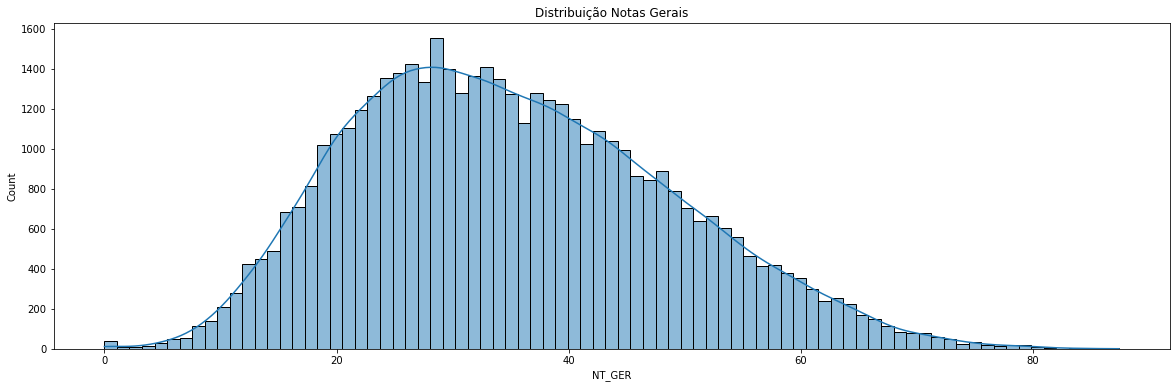

In [41]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df3, x="NT_GER", kde=True)

plt.title('Distribuição Notas Gerais')
ax = ax

In [42]:
max([x for x in df3.NT_FG.unique() if str(x) != 'nan'])

88.6

In [43]:
min([x for x in df3.NT_FG.unique() if str(x) != 'nan'])

0.0

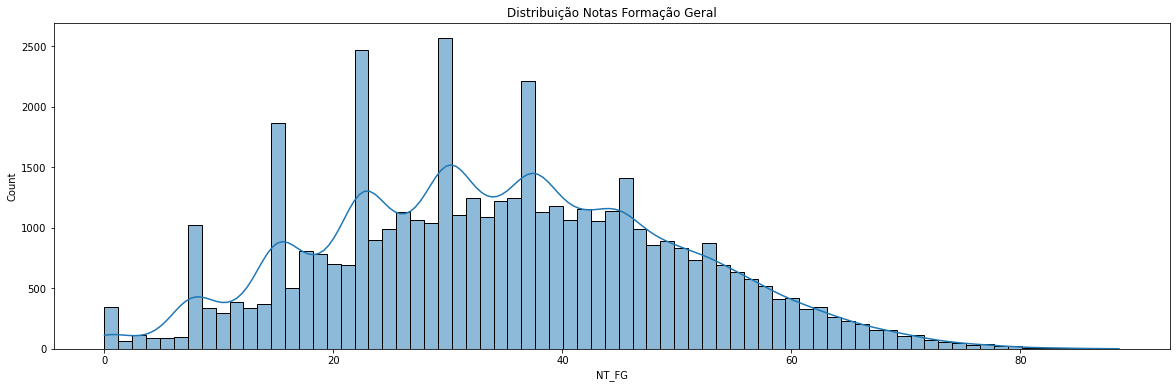

In [44]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df3, x="NT_FG", kde=True)

plt.title('Distribuição Notas Formação Geral')
ax = ax

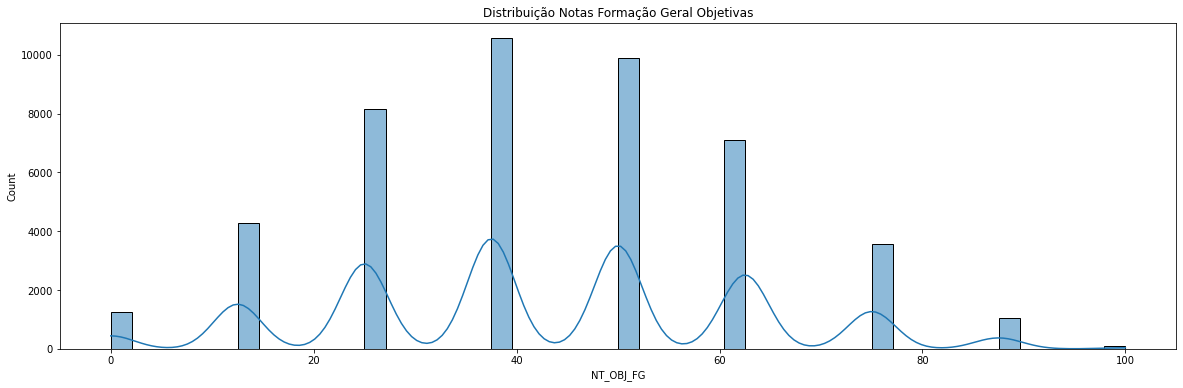

In [45]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df3, x="NT_OBJ_FG", kde=True)

plt.title('Distribuição Notas Formação Geral Objetivas')
ax = ax

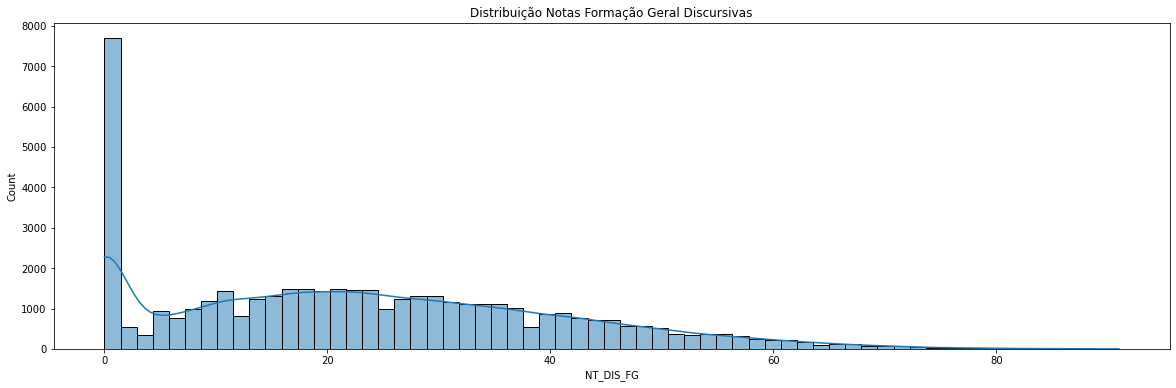

In [46]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df3, x="NT_DIS_FG", kde=True)

plt.title('Distribuição Notas Formação Geral Discursivas')
ax = ax

## Arquivo 4

In [47]:
df4 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq4.txt', sep=';')

In [48]:
df4 = df4[df4['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [49]:
pd.options.display.max_columns=99
df4

,NU_ANO,CO_CURSO,QE_I27,QE_I28,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2021,114616,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,3.0,3.0,7.0,7.0,1.0,1.0,5.0
1,2021,3211,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0
2,2021,1427749,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,6.0,4.0,6.0,8.0,8.0,8.0,4.0,1.0,8.0,8.0,8.0
3,2021,69853,1.0,3.0,2.0,3.0,2.0,4.0,2.0,1.0,1.0,6.0,3.0,2.0,4.0,2.0,1.0,4.0,3.0,2.0,1.0,5.0,1.0,1.0,1.0,7.0,6.0,1.0,1.0,3.0,4.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,6.0,7.0,5.0,1.0,6.0
4,2021,1368761,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66759,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66760,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66761,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Arquivo 5

In [50]:
df5 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq5.txt', sep=';')

In [51]:
df5 = df5[df5['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [52]:
df5

,NU_ANO,CO_CURSO,TP_SEXO
0,2021,1321335,F
1,2021,1153739,F
2,2021,5492,F
3,2021,74586,F
4,2021,88380,F
...,...,...,...
66758,2021,1300041,NaN
66759,2021,16939,NaN
66760,2021,72088,NaN
66761,2021,1520497,NaN


In [53]:
df5.TP_SEXO.value_counts()

M    55375
F    11327
Name: TP_SEXO, dtype: int64

## Arquivo 6

- NU_IDADE

In [54]:
df6 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq6.txt', sep=';')

In [55]:
df6 = df6[df6['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [56]:
df6

,NU_ANO,CO_CURSO,NU_IDADE
0,2021,1214121,7.0
1,2021,123526,17.0
2,2021,123537,18.0
3,2021,1348195,18.0
4,2021,81328,18.0
...,...,...,...
66758,2021,1300041,NaN
66759,2021,16939,NaN
66760,2021,72088,NaN
66761,2021,1520497,NaN


In [57]:
len(df6.NU_IDADE.unique())

59

In [58]:
df6.NU_IDADE.value_counts()

22.0    6605
23.0    6369
21.0    5826
24.0    5813
25.0    4887
26.0    4105
27.0    3544
28.0    2995
29.0    2622
20.0    2602
30.0    2342
31.0    2021
32.0    1815
33.0    1710
34.0    1455
35.0    1370
36.0    1200
37.0    1078
19.0    1062
38.0     966
39.0     913
40.0     800
41.0     651
42.0     600
43.0     498
44.0     409
45.0     346
46.0     311
47.0     294
48.0     230
49.0     222
50.0     157
51.0     136
53.0     106
52.0      90
18.0      85
55.0      75
54.0      72
57.0      62
56.0      60
58.0      50
60.0      25
59.0      23
61.0      18
63.0      18
62.0      17
65.0      14
64.0      12
68.0       4
67.0       4
69.0       3
70.0       2
75.0       2
66.0       2
17.0       1
73.0       1
74.0       1
7.0        1
Name: NU_IDADE, dtype: int64

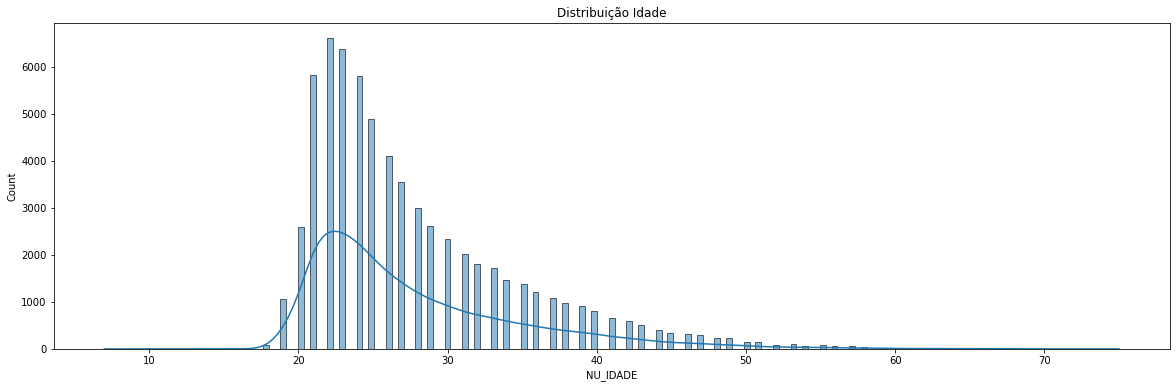

In [59]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df6, x="NU_IDADE", kde=True)

plt.title('Distribuição Idade')
ax = ax

## Arquivo 7

- QE_I01

In [60]:
df7 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq7.txt', sep=';')

In [61]:
df7 = df7[df7['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [62]:
df7

,NU_ANO,CO_CURSO,QE_I01
0,2021,121131,A
1,2021,101127,A
2,2021,1187671,A
3,2021,123530,A
4,2021,13595,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [63]:
df7.QE_I01.value_counts()

A    43144
B     9759
E     1601
C     1032
D       48
Name: QE_I01, dtype: int64

In [64]:
dict_QE_I01 = {'A': 'Solteiro(a)',
               'B': 'Casado(a)',
               'C': 'Separado(a) judicialmente/divorciado(a)',
               'D': 'Viúvo(a)',
               'E': 'Outro'
              }

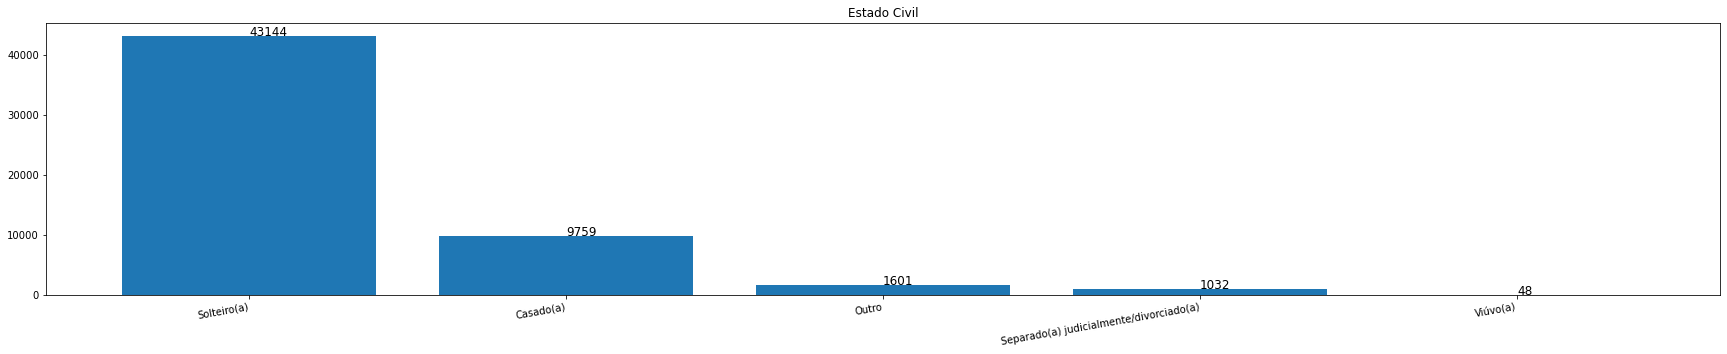

In [65]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I01[x] for x in  list(df7.QE_I01.value_counts().index)], df7.QE_I01.value_counts())
for index in range(len(df7.QE_I01.value_counts().index)):
    plt.text([dict_QE_I01[x] for x in  list(df7.QE_I01.value_counts().index)][index], df7.QE_I01.value_counts()[index], df7.QE_I01.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Estado Civil')
ax = ax

## Arquivo 8

- QE_I02

In [66]:
df8 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq8.txt', sep=';')

In [67]:
df8 = df8[df8['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [68]:
df8

,NU_ANO,CO_CURSO,QE_I02
0,2021,123530,A
1,2021,13595,A
2,2021,1119473,A
3,2021,1153739,A
4,2021,1427414,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [69]:
df8.QE_I02.value_counts()

A    30921
D    17009
B     4898
F     1400
C     1201
E      155
Name: QE_I02, dtype: int64

In [70]:
dict_QE_I02 = {'A': 'Branca',
               'B': 'Preta',
               'C': 'Amarela',
               'D': 'Parda',
               'E': 'Indígena',
               'F': 'Não quero declarar'
              }

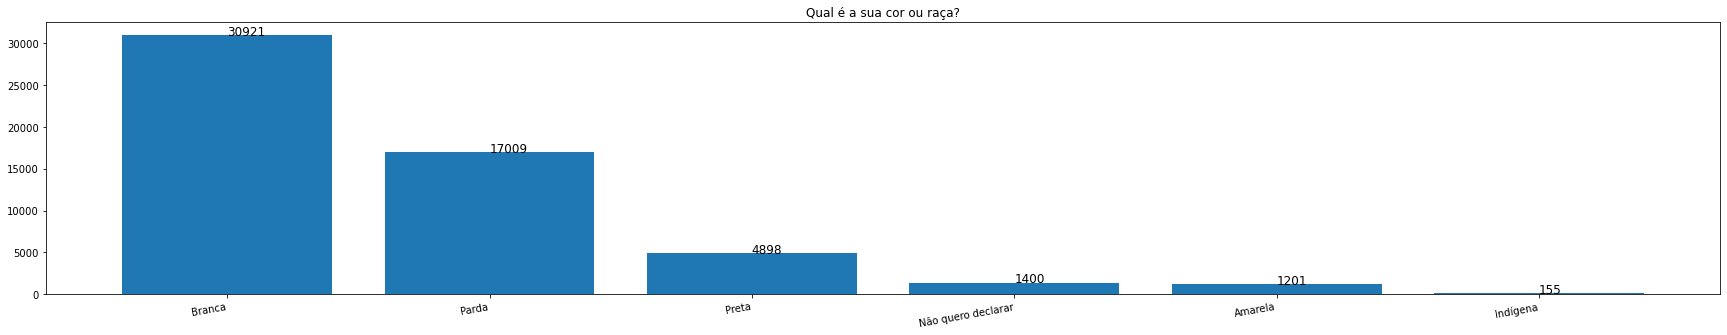

In [71]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I02[x] for x in  list(df8.QE_I02.value_counts().index)], df8.QE_I02.value_counts())
for index in range(len(df8.QE_I02.value_counts().index)):
    plt.text([dict_QE_I02[x] for x in  list(df8.QE_I02.value_counts().index)][index], df8.QE_I02.value_counts()[index], df8.QE_I02.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual é a sua cor ou raça?')
ax = ax

## Arquivo 9

In [72]:
df9 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq9.txt', sep=';')

In [73]:
df9 = df9[df9['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [74]:
df9

,NU_ANO,CO_CURSO,QE_I03
0,2021,121131,A
1,2021,1166010,A
2,2021,101127,A
3,2021,1187671,A
4,2021,123530,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [75]:
df9.QE_I03.value_counts()

A    54850
B      592
C      141
Name: QE_I03, dtype: int64

In [76]:
dict_QE_I03 = {'A': 'Brasileira',
               'B': 'Brasileira naturalizada',
               'C': 'Estrangeira'
              }

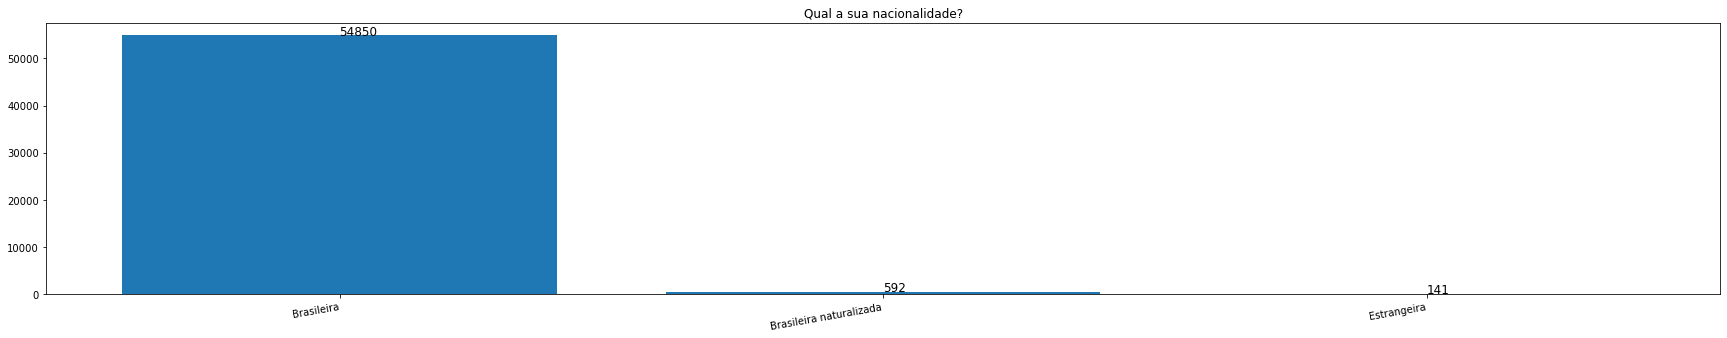

In [77]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I03[x] for x in  list(df9.QE_I03.value_counts().index)], df9.QE_I03.value_counts())
for index in range(len(df9.QE_I03.value_counts().index)):
    plt.text([dict_QE_I03[x] for x in  list(df9.QE_I03.value_counts().index)][index], df9.QE_I03.value_counts()[index], df9.QE_I03.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual a sua nacionalidade?')
ax = ax

## Arquivo 10

- QE_I04

In [78]:
df10 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq10.txt', sep=';')

In [79]:
df10 = df10[df10['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [80]:
df10

,NU_ANO,CO_CURSO,QE_I04
0,2021,1364335,A
1,2021,1150279,A
2,2021,13881,A
3,2021,1266797,A
4,2021,1330719,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [81]:
df10.QE_I04.value_counts()

D    21143
B    10522
E     9635
C     8518
F     3371
A     2393
Name: QE_I04, dtype: int64

In [82]:
dict_QE_I04 = {'A': 'Nenhuma',
               'B': 'Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)',
               'C': 'Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)',
               'D': 'Ensino Médio',
               'E': 'Ensino Superior - Graduação',
               'F': 'Pós-graduação'
              }

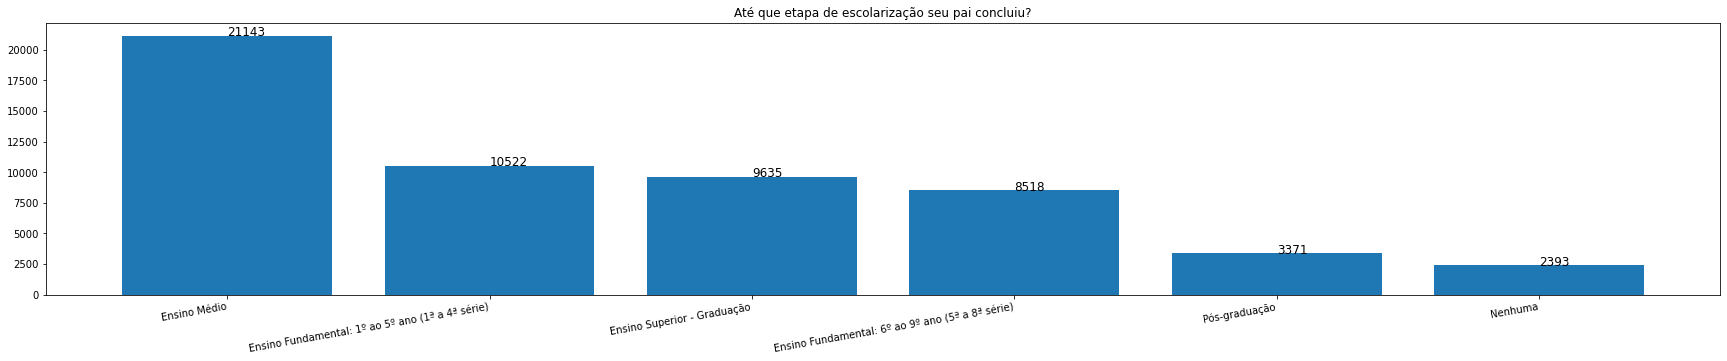

In [83]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I04[x] for x in  list(df10.QE_I04.value_counts().index)], df10.QE_I04.value_counts())
for index in range(len(df10.QE_I04.value_counts().index)):
    plt.text([dict_QE_I04[x] for x in  list(df10.QE_I04.value_counts().index)][index], df10.QE_I04.value_counts()[index], df10.QE_I04.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Até que etapa de escolarização seu pai concluiu?')
ax = ax

## Arquivo 11

- QE_I05

In [84]:
df11 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq11.txt', sep=';')

In [85]:
df11 = df11[df11['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [86]:
df11

,NU_ANO,CO_CURSO,QE_I05
0,2021,1427414,A
1,2021,53520,A
2,2021,13881,A
3,2021,1266797,A
4,2021,1286800,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [346]:
df11[~(df11.QE_I05).isna()].tail(30)

,NU_ANO,CO_CURSO,QE_I05
55552,2021,1288703,F
55553,2021,66272,F
55554,2021,72331,F
55555,2021,40343,F
55556,2021,1330218,F
55557,2021,111980,F
55558,2021,116390,F
55559,2021,116390,F
55560,2021,116390,F
55561,2021,1286732,F


In [87]:
df11.QE_I05.value_counts()

D    22135
E    10569
B     8203
C     8088
F     5471
A     1116
Name: QE_I05, dtype: int64

In [88]:
dict_QE_I05 = {'A': 'Nenhuma',
               'B': 'Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)',
               'C': 'Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)',
               'D': 'Ensino Médio',
               'E': 'Ensino Superior - Graduação',
               'F': 'Pós-graduação'
              }

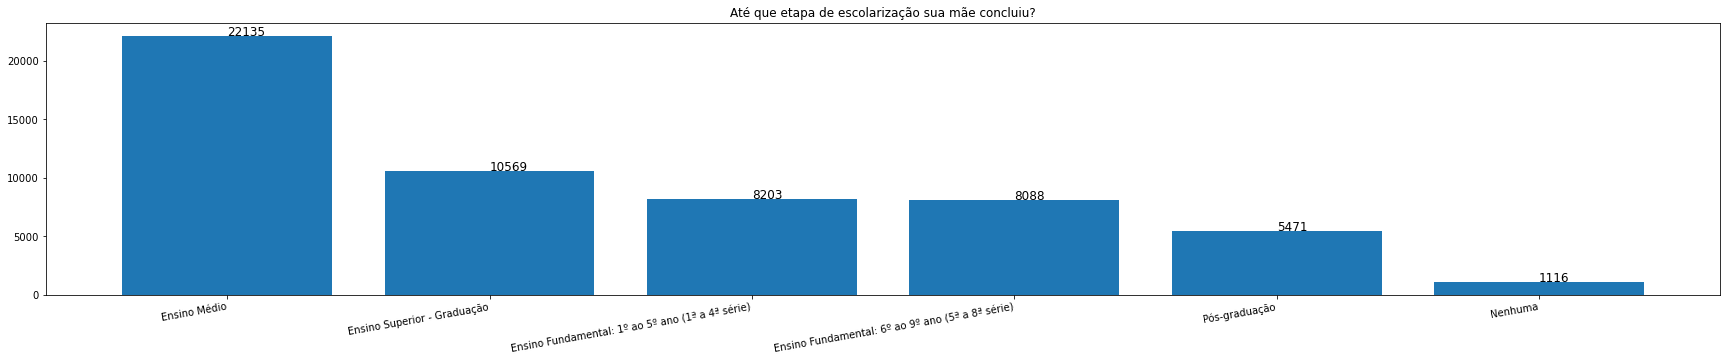

In [89]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I05[x] for x in  list(df11.QE_I05.value_counts().index)], df11.QE_I05.value_counts())
for index in range(len(df11.QE_I05.value_counts().index)):
    plt.text([dict_QE_I05[x] for x in  list(df11.QE_I05.value_counts().index)][index], df11.QE_I05.value_counts()[index], df11.QE_I05.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Até que etapa de escolarização sua mãe concluiu?')
ax = ax

## Arquivo 12

- QE_I06

In [90]:
df12 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq12.txt', sep=';')

In [91]:
df12 = df12[df12['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [92]:
df12

,NU_ANO,CO_CURSO,QE_I06
0,2021,121131,A
1,2021,53520,A
2,2021,1364335,A
3,2021,1150279,A
4,2021,13881,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [93]:
df12.QE_I06.value_counts()

B    33883
C    13796
A     5481
D     2171
F      220
E       33
Name: QE_I06, dtype: int64

In [94]:
dict_QE_I06 = {'A': 'Em casa ou apartamento, sozinho',
               'B': 'Em casa ou apartamento, com pais e/ou parentes',
               'C': 'Em casa ou apartamento, com cônjuge e/ou filhos',
               'D': 'Em casa ou apartamento, com outras pessoas (incluindo república)',
               'E': 'Em alojamento universitário da própria instituição',
               'F': 'Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)'
              }

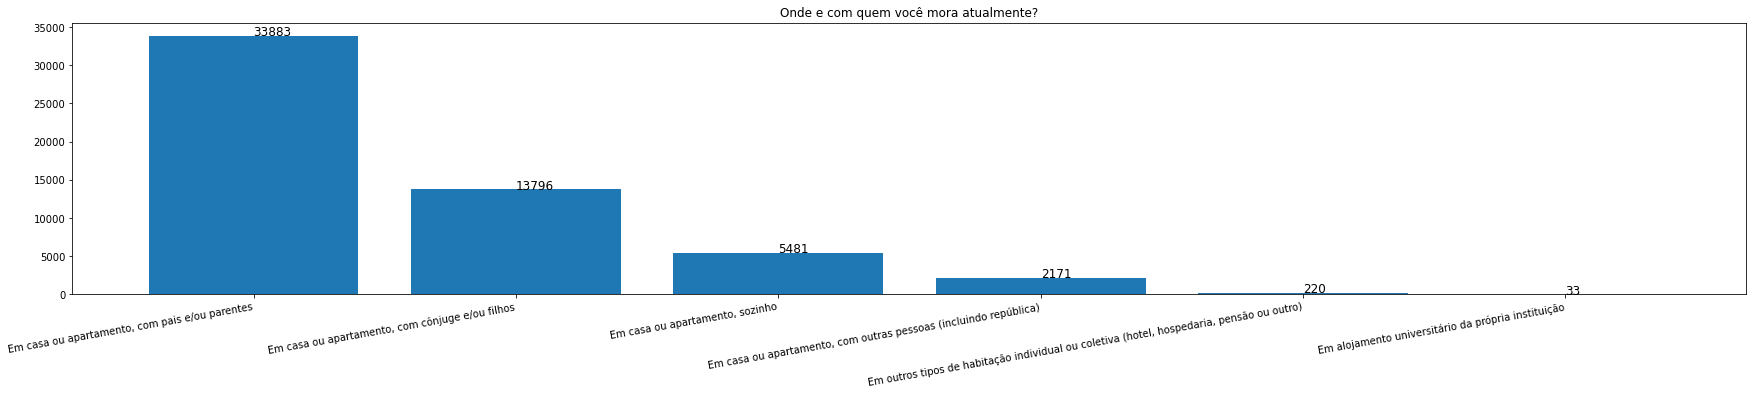

In [95]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I06[x] for x in  list(df12.QE_I06.value_counts().index)], df12.QE_I06.value_counts())
for index in range(len(df12.QE_I06.value_counts().index)):
    plt.text([dict_QE_I06[x] for x in  list(df12.QE_I06.value_counts().index)][index], df12.QE_I06.value_counts()[index], df12.QE_I06.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Onde e com quem você mora atualmente?')
ax = ax

## Arquivo 13

- QE_I07

In [96]:
df13 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq13.txt', sep=';')

In [97]:
df13 = df13[df13['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [98]:
df13

,NU_ANO,CO_CURSO,QE_I07
0,2021,121131,A
1,2021,1153739,A
2,2021,53520,A
3,2021,1364335,A
4,2021,13881,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [99]:
df13.QE_I07.value_counts()

C    14020
D    13682
B    10669
E     6827
A     6398
F     2565
G      834
H      590
Name: QE_I07, dtype: int64

In [100]:
dict_QE_I07 = {'A': 'Nenhuma',
               'B': 'Uma',
               'C': 'Duas',
               'D': 'Três',
               'E': 'Quatro',
               'F': 'Cinco',
               'G': 'Seis',
               'H': 'Sete ou mais'
              }

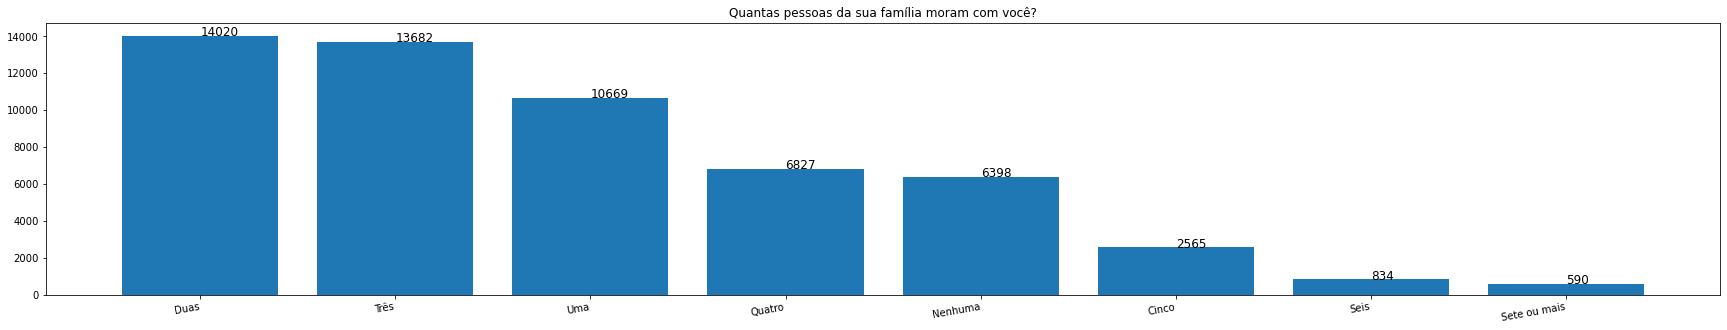

In [101]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I07[x] for x in  list(df13.QE_I07.value_counts().index)], df13.QE_I07.value_counts())
for index in range(len(df13.QE_I07.value_counts().index)):
    plt.text([dict_QE_I07[x] for x in  list(df13.QE_I07.value_counts().index)][index], df13.QE_I07.value_counts()[index], df13.QE_I07.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Quantas pessoas da sua família moram com você?')
ax = ax

## Arquivo 14

- QE_I08

In [102]:
df14 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq14.txt', sep=';')

In [103]:
df14 = df14[df14['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [104]:
df14

,NU_ANO,CO_CURSO,QE_I08
0,2021,101127,A
1,2021,1321335,A
2,2021,1167971,A
3,2021,53520,A
4,2021,1364335,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [105]:
df14.QE_I08.value_counts()

B    15429
C    11179
E     8691
D     8262
A     6819
F     4677
G      528
Name: QE_I08, dtype: int64

In [106]:
dict_QE_I08 = {'A': 'Até 1,5 salário mínimo (até R$ 1.650,00)',
               'B': 'De 1,5 a 3 salários mínimos (R$ 1.650,01 a R$ 3.300,00)',
               'C': 'De 3 a 4,5 salários mínimos (R$ 3.300,01 a R$ 4.950,00)',
               'D': 'De 4,5 a 6 salários mínimos (R$ 4.950,01 a R$ 6.600,00)',
               'E': 'De 6 a 10 salários mínimos (R$ 6.600,01 a R$ 11.000,00)',
               'F': 'De 10 a 30 salários mínimos (R$ 11.000,01 a R$ 33.000,00)',
               'G': 'Acima de 30 salários mínimos (mais de R$ 33.000,00)'
              }

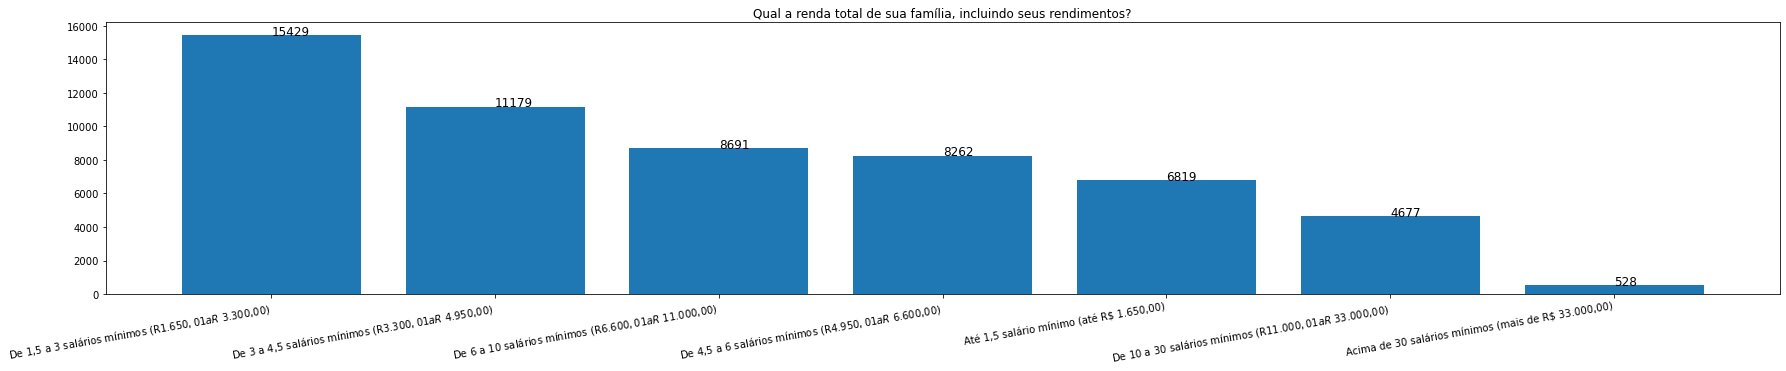

In [107]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I08[x] for x in  list(df14.QE_I08.value_counts().index)], df14.QE_I08.value_counts())
for index in range(len(df14.QE_I08.value_counts().index)):
    plt.text([dict_QE_I08[x] for x in  list(df14.QE_I08.value_counts().index)][index], df14.QE_I08.value_counts()[index], df14.QE_I08.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual a renda total de sua família, incluindo seus rendimentos?')
ax = ax

## Arquivo 15

- QE_I09

In [108]:
df15 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq15.txt', sep=';')

In [109]:
df15 = df15[df15['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [110]:
df15

,NU_ANO,CO_CURSO,QE_I09
0,2021,13881,A
1,2021,74586,A
2,2021,1153949,A
3,2021,1119473,A
4,2021,1205024,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [111]:
df15.QE_I09.value_counts()

E    14057
C    13166
D    11695
B     8164
F     7322
A     1178
Name: QE_I09, dtype: int64

In [112]:
dict_QE_I09 = {'A': 'Não tenho renda e meus gastos são financiados por programas governamentais',
               'B': 'Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas',
               'C': 'Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos',
               'D': 'Tenho renda e não preciso de ajuda para financiar meus gastos',
               'E': 'Tenho renda e contribuo com o sustento da família',
               'F': 'Sou o principal responsável pelo sustento da família'
              }

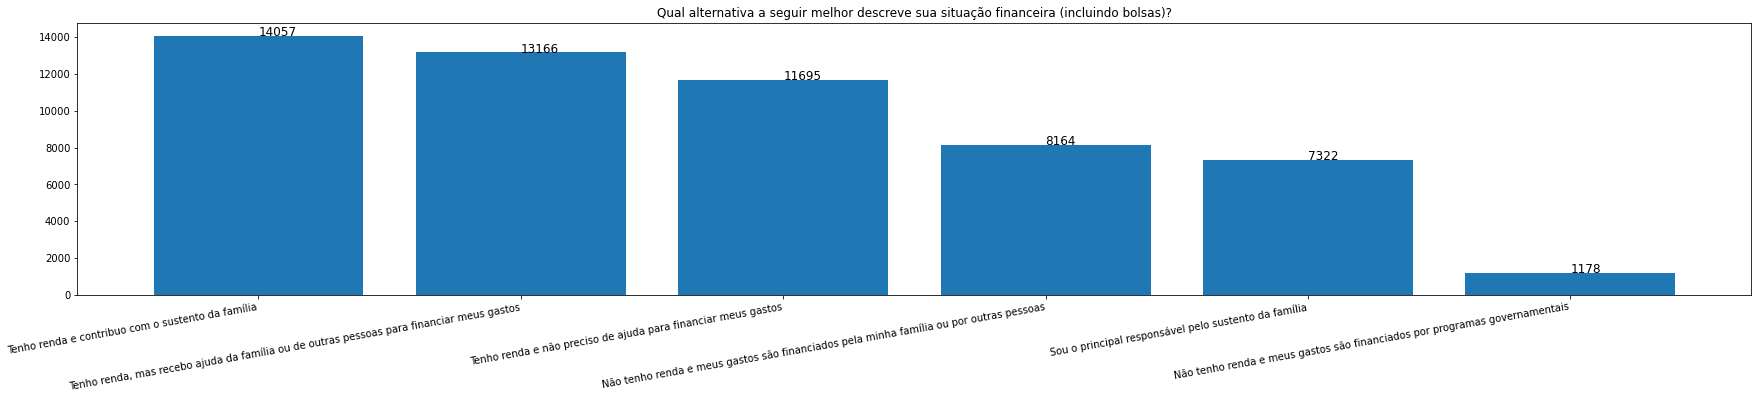

In [113]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I09[x] for x in  list(df15.QE_I09.value_counts().index)], df15.QE_I09.value_counts())
for index in range(len(df15.QE_I09.value_counts().index)):
    plt.text([dict_QE_I09[x] for x in  list(df15.QE_I09.value_counts().index)][index], df15.QE_I09.value_counts()[index], df15.QE_I09.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual alternativa a seguir melhor descreve sua situação financeira (incluindo bolsas)?')
ax = ax

## Arquivo 16

- QE_I10

In [114]:
df16 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq16.txt', sep=';')

In [115]:
df16 = df16[df16['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [116]:
df16

,NU_ANO,CO_CURSO,QE_I10
0,2021,13595,A
1,2021,1170124,A
2,2021,1321335,A
3,2021,53520,A
4,2021,5492,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [117]:
dict_QE_I10 = {'A': 'Não estou trabalhando',
               'B': 'Trabalho eventualmente',
               'C': 'Trabalho até 20 horas semanais',
               'D': 'Trabalho de 21 a 39 horas semanais',
               'E': 'Trabalho 40 horas semanais ou mais'
              }

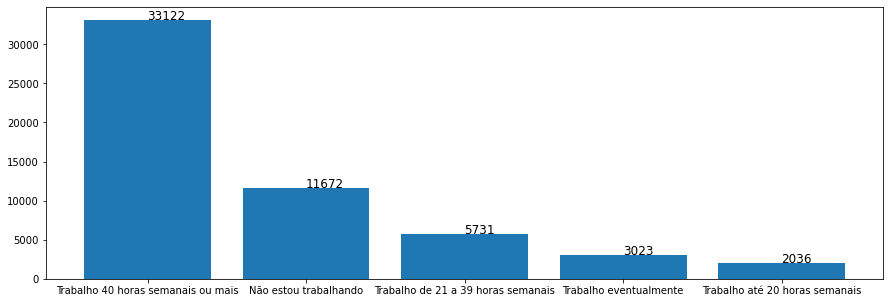

In [118]:
plt.figure(figsize=(15,5))
ax = plt.bar([dict_QE_I10[x] for x in  list(df16.QE_I10.value_counts().index)], df16.QE_I10.value_counts())
for index in range(len(df16.QE_I10.value_counts().index)):
    plt.text([dict_QE_I10[x] for x in  list(df16.QE_I10.value_counts().index)][index], df16.QE_I10.value_counts()[index], df16.QE_I10.value_counts()[index], size=12)

ax = ax

## Arquivo 17

- QE_I11

In [119]:
df17 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq17.txt', sep=';')

In [120]:
df17 = df17[df17['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [121]:
df17

,NU_ANO,CO_CURSO,QE_I11
0,2021,121131,A
1,2021,101127,A
2,2021,1187671,A
3,2021,1321335,A
4,2021,1167971,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [122]:
df17.QE_I11.value_counts()

B    18192
A    17076
H     8554
C     3862
I     2576
E     1524
J     1186
D     1146
G      904
F      284
K      281
Name: QE_I11, dtype: int64

In [123]:
dict_QE_I11 = {'A': 'Nenhum, pois meu curso é gratuito',
               'B': 'Nenhum, embora meu curso não seja gratuito',
               'C': 'ProUni integral',
               'D': 'ProUni parcial, apenas',
               'E': 'FIES, apenas',
               'F': 'ProUni Parcial e FIES',
               'G': 'Bolsa oferecida por governo estadual, distrital ou municipal.',
               'H': 'Bolsa oferecida pela própria instituição',
               'I': 'Bolsa oferecida por outra entidade (empresa, ONG, outra)',
               'J': 'Financiamento oferecido pela própria instituição',
               'K': 'Financiamento bancário'
              }

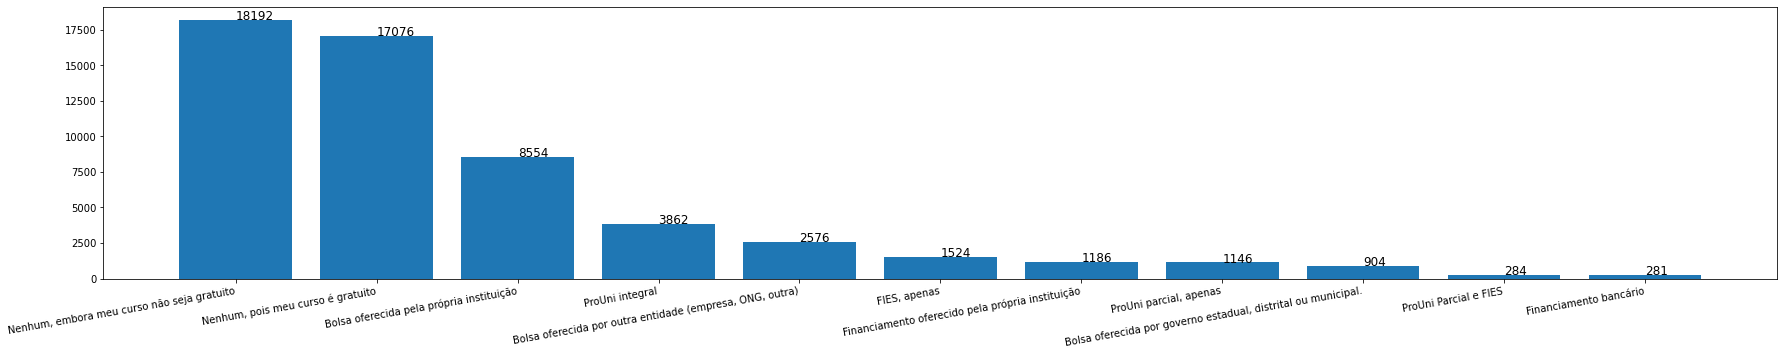

In [124]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I11[x] for x in  list(df17.QE_I11.value_counts().index)], df17.QE_I11.value_counts())
for index in range(len(df17.QE_I11.value_counts().index)):
    plt.text([dict_QE_I11[x] for x in  list(df17.QE_I11.value_counts().index)][index], df17.QE_I11.value_counts()[index], df17.QE_I11.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
ax = ax

## Arquivo 18

In [125]:
info.iloc[17][1]

'Edição, código de curso e QE12: Ao longo da sua trajetória acadêmica, você recebeu algum tipo de auxílio permanência? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração.'

In [126]:
df18 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq18.txt', sep=';')

In [127]:
df18 = df18[df18['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [128]:
df18

,NU_ANO,CO_CURSO,QE_I12
0,2021,121131,A
1,2021,1166010,A
2,2021,1187671,A
3,2021,123530,A
4,2021,13595,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [129]:
df18.QE_I12.isna().sum()

11180

In [130]:
df18.QE_I12.value_counts()

A    51114
F     1458
C     1061
E      987
D      538
B      425
Name: QE_I12, dtype: int64

In [131]:
dict_QE_I12 = {'A': 'Nenhum',
               'B': 'Auxílio moradia',
               'C': 'Auxílio alimentação',
               'D': 'Auxílio moradia e alimentação',
               'E': 'Auxílio permanência',
               'F': 'Outro tipo de auxílio',
              }

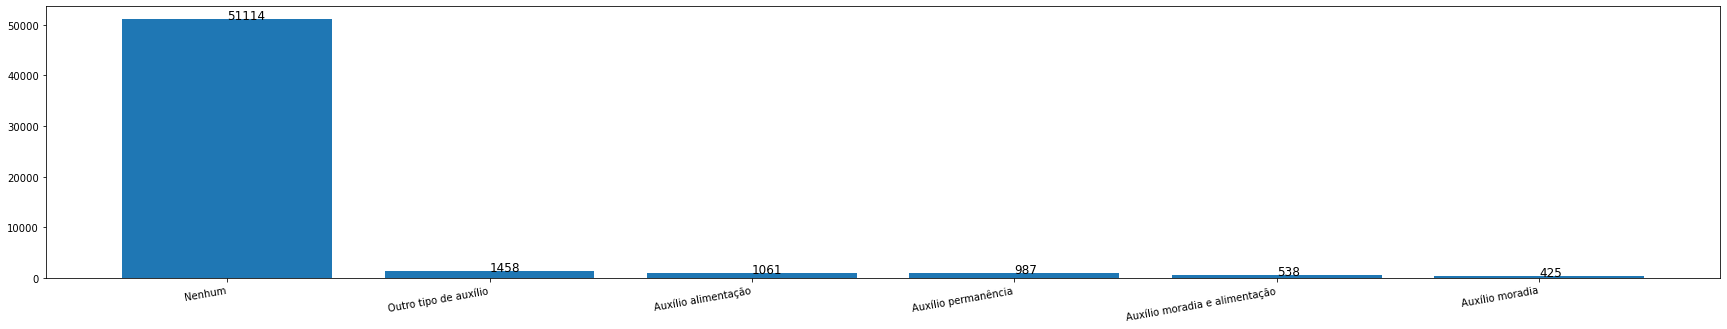

In [132]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I12[x] for x in  list(df18.QE_I12.value_counts().index)], df18.QE_I12.value_counts())
for index in range(len(df18.QE_I12.value_counts().index)):
    plt.text([dict_QE_I12[x] for x in  list(df18.QE_I12.value_counts().index)][index], df18.QE_I12.value_counts()[index], df18.QE_I12.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
ax = ax

## Arquivo 19

In [133]:
info.iloc[18][1]

'Edição, código de curso e QE 13: Ao longo da sua trajetória acadêmica, você recebeu algum tipo de bolsa acadêmica? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração.'

In [134]:
df19 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq19.txt', sep=';')

In [135]:
df19 = df19[df19['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [136]:
df19

,NU_ANO,CO_CURSO,QE_I13
0,2021,121131,A
1,2021,1166010,A
2,2021,101127,A
3,2021,123530,A
4,2021,1170124,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [137]:
df19.QE_I13.isna().sum()

11179

In [138]:
df19.QE_I13.value_counts()

A    45923
F     3471
B     2863
C     1524
D     1482
E      321
Name: QE_I13, dtype: int64

In [139]:
dict_QE_I13 = {'A': 'Nenhum',
               'B': 'Bolsa de iniciação científica',
               'C': 'Bolsa de extensão',
               'D': 'Bolsa de monitoria/tutoria',
               'E': 'Bolsa PET',
               'F': 'Outro tipo de bolsa acadêmica',
              }

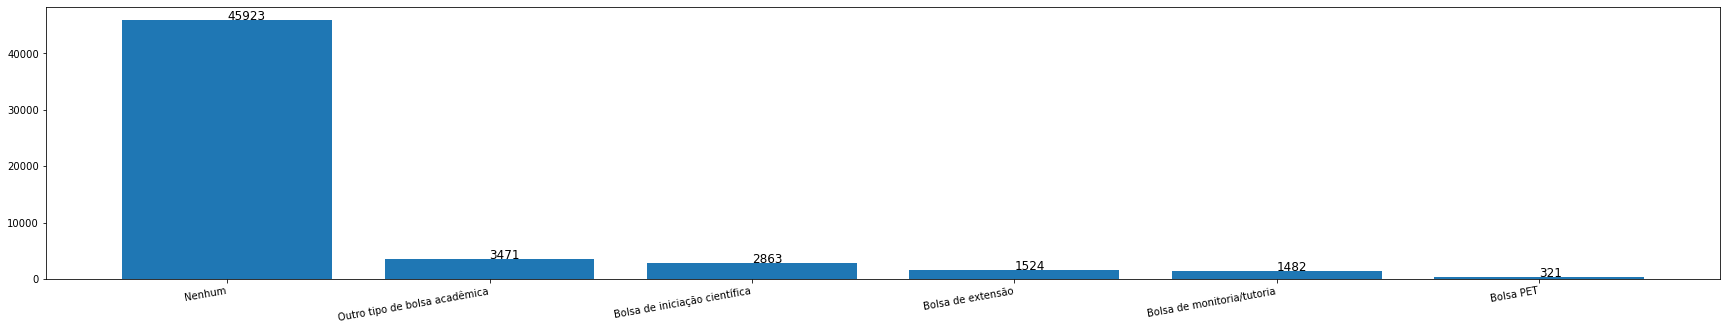

In [140]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I13[x] for x in  list(df19.QE_I13.value_counts().index)], df19.QE_I13.value_counts())
for index in range(len(df19.QE_I13.value_counts().index)):
    plt.text([dict_QE_I13[x] for x in  list(df19.QE_I13.value_counts().index)][index], df19.QE_I13.value_counts()[index], df19.QE_I13.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
ax = ax

## Arquivo 20

In [141]:
info.iloc[19][1]

'Edição, código de curso e QE14: Durante o curso de graduação você participou de programas e/ou atividades curriculares no exterior?'

In [142]:
df20 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq20.txt', sep=';')

In [143]:
df20 = df20[df20['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [144]:
df20

,NU_ANO,CO_CURSO,QE_I14
0,2021,121131,A
1,2021,1166010,A
2,2021,101127,A
3,2021,1187671,A
4,2021,123530,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [145]:
df20.QE_I14.isna().sum()

11178

In [146]:
df20.QE_I14.value_counts()

A    54740
F      329
E      320
B      153
C       28
D       15
Name: QE_I14, dtype: int64

In [147]:
dict_QE_I14 = {'A': 'Não participei',
               'B': 'Sim, Programa Ciência sem Fronteiras',
               'C': 'Sim, programa de intercâmbio financiado pelo Governo Federal (Marca; Brafitec; PLI; outro)',
               'D': 'Sim, programa de intercâmbio financiado pelo Governo Estadual',
               'E': 'Sim, programa de intercâmbio da minha instituição',
               'F': 'Sim, outro intercâmbio não institucional',
              }

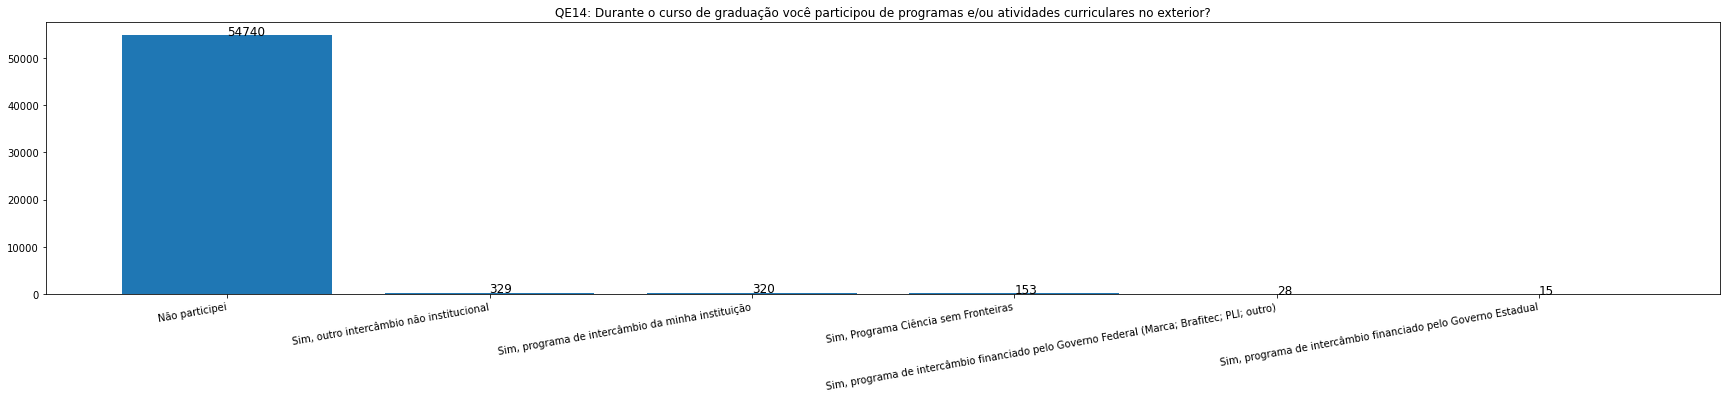

In [148]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I14[x] for x in  list(df20.QE_I14.value_counts().index)], df20.QE_I14.value_counts())
for index in range(len(df20.QE_I14.value_counts().index)):
    plt.text([dict_QE_I14[x] for x in  list(df20.QE_I14.value_counts().index)][index], df20.QE_I14.value_counts()[index], df20.QE_I14.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE14: Durante o curso de graduação você participou de programas e/ou atividades curriculares no exterior?')
ax = ax

## Arquivo 21

In [149]:
info.iloc[20][1]

'Edição, código de curso e QE15: Seu ingresso no curso de graduação se deu por meio de políticas de ação afirmativa ou inclusão social?'

In [150]:
df21 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq21.txt', sep=';')

In [151]:
df21 = df21[df21['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [152]:
df21

,NU_ANO,CO_CURSO,QE_I15
0,2021,1166010,A
1,2021,101127,A
2,2021,1187671,A
3,2021,123530,A
4,2021,1170124,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [153]:
df21.QE_I15.isna().sum()

11181

In [154]:
df21.QE_I15.value_counts()

A    43623
D     4698
E     2952
C     2565
B     1087
F      657
Name: QE_I15, dtype: int64

In [155]:
dict_QE_I15 = {'A': 'Não',
               'B': 'Sim, por critério étnico-racial',
               'C': 'Sim, por critério de renda',
               'D': 'Sim, por ter estudado em escola pública ou particular com bolsa de estudos',
               'E': 'Sim, por sistema que combina dois ou mais critérios anteriores',
               'F': 'Sim, por sistema diferente dos anteriores',
              }

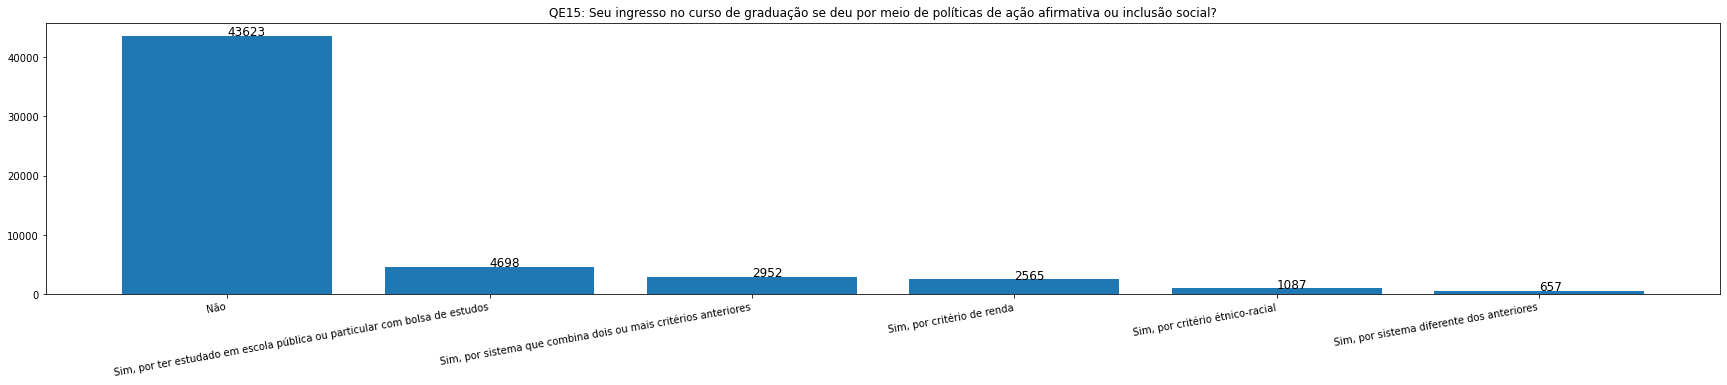

In [156]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I15[x] for x in  list(df21.QE_I15.value_counts().index)], df21.QE_I15.value_counts())
for index in range(len(df21.QE_I15.value_counts().index)):
    plt.text([dict_QE_I15[x] for x in  list(df21.QE_I15.value_counts().index)][index], df21.QE_I15.value_counts()[index], df21.QE_I15.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE15: Seu ingresso no curso de graduação se deu por meio de políticas de ação afirmativa ou inclusão social?')
ax = ax

## Arquivo 22

In [157]:
info.iloc[21][1]

'Edição, código de curso e QE16: Em que unidade da Federação você concluiu o ensino médio?'

In [158]:
df22 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq22.txt', sep=';')

In [159]:
df22 = df22[df22['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [160]:
df22['QE_I16'] = df22['QE_I16'].astype(str)

In [161]:
df22

,NU_ANO,CO_CURSO,QE_I16
0,2021,1364335,11.0
1,2021,1170053,11.0
2,2021,1166010,11.0
3,2021,1170053,11.0
4,2021,1166010,11.0
...,...,...,...
66758,2021,123336,nan
66759,2021,123336,nan
66760,2021,123336,nan
66761,2021,123336,nan


In [162]:
len(df22[df22.QE_I16=='nan'])

11179

In [163]:
df22.QE_I16.value_counts()

35.0    18198
nan     11179
33.0     5266
31.0     5014
43.0     3691
41.0     3068
42.0     2193
26.0     2177
23.0     1866
29.0     1853
53.0     1785
52.0     1452
15.0     1129
32.0      989
25.0      911
13.0      811
21.0      787
22.0      633
24.0      539
51.0      530
27.0      496
50.0      481
28.0      404
17.0      342
11.0      330
99.0      242
16.0      150
14.0      146
12.0      101
Name: QE_I16, dtype: int64

In [164]:
dict_QE_I16 = {'11.0': '11',
               '12.0': '12',
               '13.0': '13',
               '14.0': '14',
               '15.0': '15',
               '16.0': '16',
               '17.0': '17',
               '21.0': '21',
               '22.0': '22',
               '23.0': '23',
               '24.0': '24',
               '25.0': '25',
               '26.0': '26',
               '27.0': '27',
               '28.0': '28',
               '29.0': '29',
               '31.0': '31',
               '32.0': '32',
               '33.0': '33',
               '35.0': '35',
               '41.0': '41',
               '42.0': '42',
               '43.0': '43',
               '50.0': '50',
               '51.0': '51',
               '52.0': '52',
               '53.0': '53',
               '99.0': '54',
               'nan': 'nan'
              }

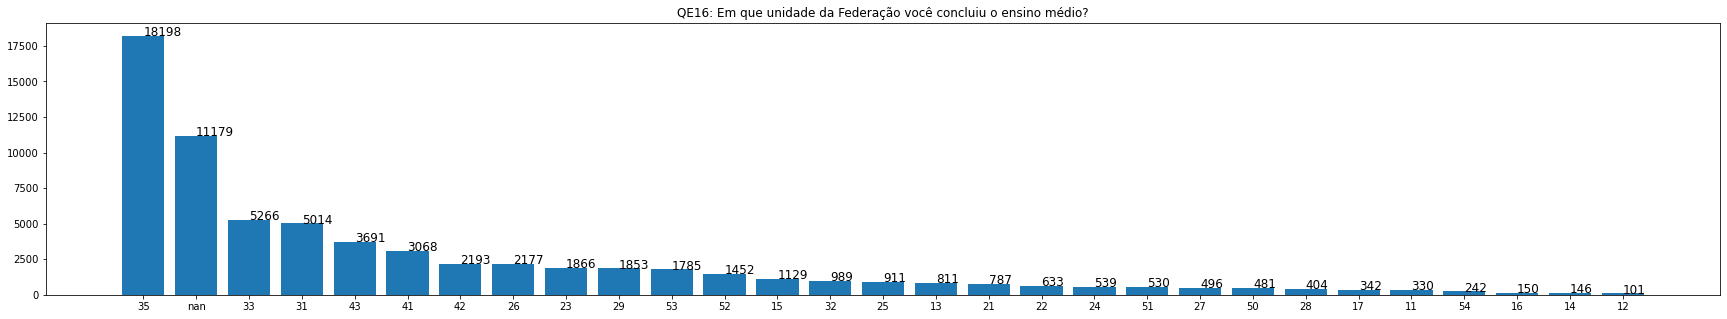

In [165]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I16[x] for x in  list(df22.QE_I16.value_counts().index)], df22.QE_I16.value_counts())
for index in range(len(df22.QE_I16.value_counts().index)):
    plt.text([dict_QE_I16[x] for x in  list(df22.QE_I16.value_counts().index)][index], df22.QE_I16.value_counts()[index], df22.QE_I16.value_counts()[index], size=12)

# plt.xticks(rotation=10, ha='right')
plt.title('QE16: Em que unidade da Federação você concluiu o ensino médio?')
ax = ax

## Arquivo 23

- QE_I17

In [166]:
info.iloc[22][1]

'Edição, código de curso e QE17: Em que tipo de escola você cursou o ensino médio?'

In [167]:
df23 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq23.txt', sep=';')

In [168]:
df23 = df23[df23['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [169]:
df23

,NU_ANO,CO_CURSO,QE_I17
0,2021,121131,A
1,2021,13595,A
2,2021,1170124,A
3,2021,1119473,A
4,2021,1153739,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [170]:
df23.QE_I17.isna().sum()

11180

In [171]:
df23.QE_I17.value_counts()

A    36488
B    13905
D     2598
E     2399
F      110
C       83
Name: QE_I17, dtype: int64

In [172]:
dict_QE_I17 = {'A': 'Todo em escola pública',
               'B': 'Todo em escola privada (particular)',
               'C': 'Todo no exterior',
               'D': 'A maior parte em escola pública',
               'E': 'A maior parte em escola privada (particular)',
               'F': 'Parte no Brasil e parte no exterior',
              }

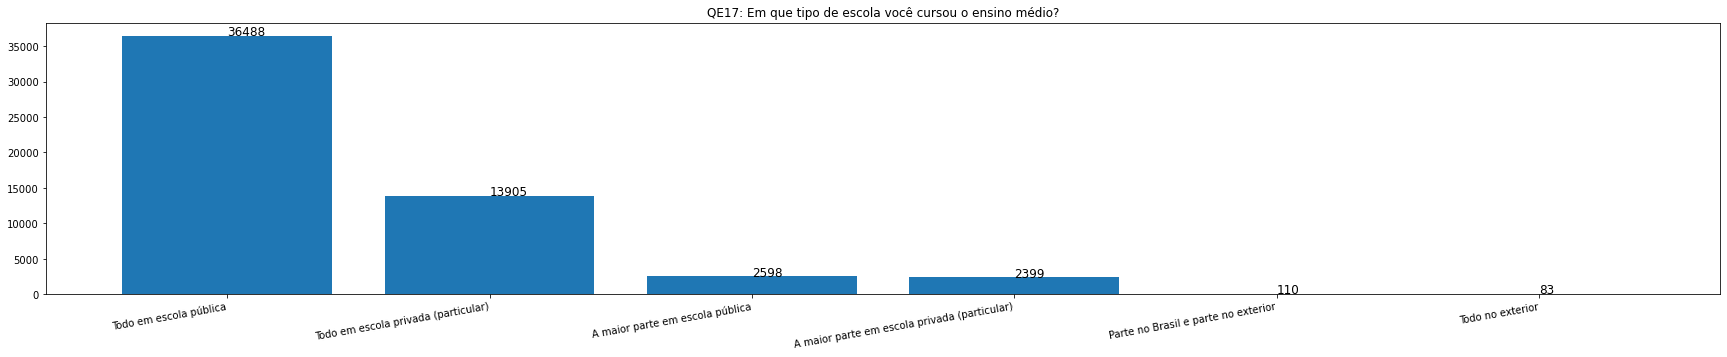

In [173]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I17[x] for x in  list(df23.QE_I17.value_counts().index)], df23.QE_I17.value_counts())
for index in range(len(df23.QE_I17.value_counts().index)):
    plt.text([dict_QE_I17[x] for x in  list(df23.QE_I17.value_counts().index)][index], df23.QE_I17.value_counts()[index], df23.QE_I17.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE17: Em que tipo de escola você cursou o ensino médio?')
ax = ax

## Arquivo 24

In [174]:
info.iloc[23][1]

'Edição, código de curso e QE18: Qual modalidade de ensino médio você concluiu?'

In [175]:
df24 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq24.txt', sep=';')

In [176]:
df24 = df24[df24['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [177]:
df24

,NU_ANO,CO_CURSO,QE_I18
0,2021,101127,A
1,2021,1187671,A
2,2021,123530,A
3,2021,13595,A
4,2021,1170124,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [178]:
df24.QE_I18.isna().sum()

11180

In [179]:
df24.QE_I18.value_counts()

A    43856
B     7652
D     3188
E      634
C      253
Name: QE_I18, dtype: int64

In [180]:
dict_QE_I18 = {'A': 'Ensino médio tradicional',
               'B': 'Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro)',
               'C': 'Profissionalizante magistério (Curso Normal)',
               'D': 'Educação de Jovens e Adultos (EJA) e/ou Supletivo',
               'E': 'Outra modalidade'
              }

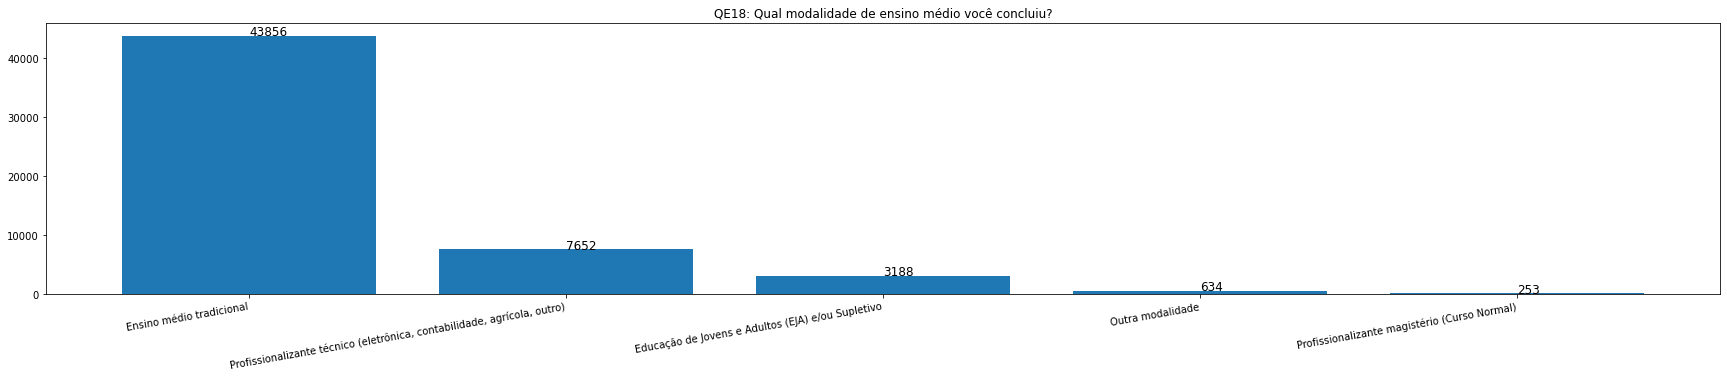

In [181]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I18[x] for x in  list(df24.QE_I18.value_counts().index)], df24.QE_I18.value_counts())
for index in range(len(df24.QE_I18.value_counts().index)):
    plt.text([dict_QE_I18[x] for x in  list(df24.QE_I18.value_counts().index)][index], df24.QE_I18.value_counts()[index], df24.QE_I18.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE18: Qual modalidade de ensino médio você concluiu?')
ax = ax

## Arquivo 25

In [182]:
info.iloc[24][1]

'Edição, código de curso e QE19: Quem lhe deu maior incentivo para cursar a graduação?'

In [183]:
df25 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq25.txt', sep=';')

In [184]:
df25 = df25[df25['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [185]:
df25

,NU_ANO,CO_CURSO,QE_I19
0,2021,1166010,A
1,2021,1321335,A
2,2021,1167971,A
3,2021,1119382,A
4,2021,1364335,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [186]:
df25.QE_I19.isna().sum()

11179

In [187]:
df25.QE_I19.value_counts()

B    33287
A    12185
C     4202
F     2844
G     1806
D     1155
E      105
Name: QE_I19, dtype: int64

In [188]:
dict_QE_I19 = {'A': 'Ninguém',
               'B': 'Pais',
               'C': 'Outros membros da família que não os pais',
               'D': 'Professores',
               'E': 'Líder ou representante religioso',
               'F': 'Colegas/Amigos',
               'G': 'Outras pessoas'
              }

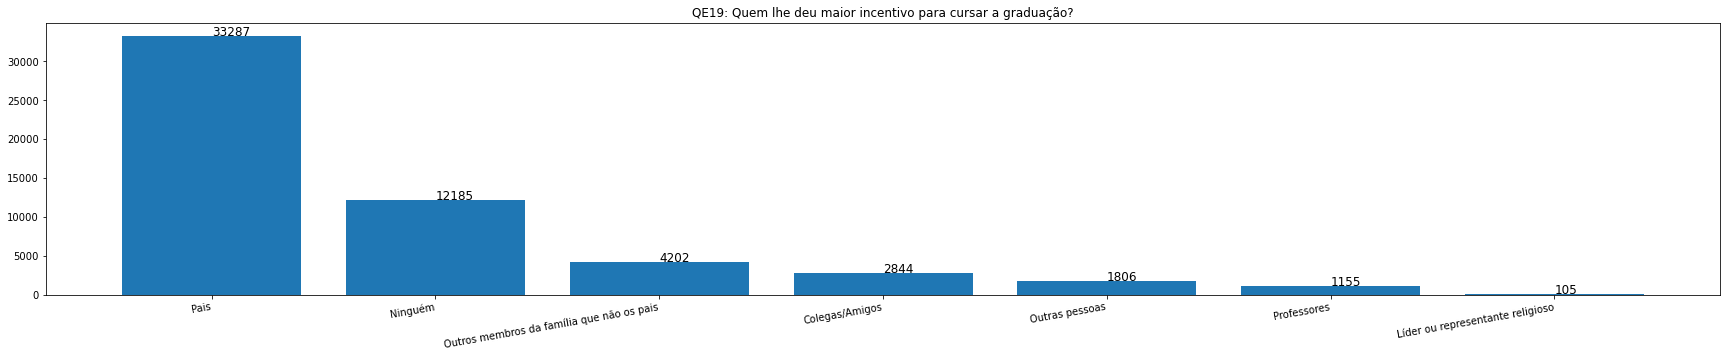

In [189]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I19[x] for x in  list(df25.QE_I19.value_counts().index)], df25.QE_I19.value_counts())
for index in range(len(df25.QE_I19.value_counts().index)):
    plt.text([dict_QE_I19[x] for x in  list(df25.QE_I19.value_counts().index)][index], df25.QE_I19.value_counts()[index], df25.QE_I19.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE19: Quem lhe deu maior incentivo para cursar a graduação?')
ax = ax

## Arquivo 26

- QE_I20

In [190]:
info.iloc[25][1]

'Edição, código de curso e QE20: Algum dos grupos abaixo foi determinante para você enfrentar dificuldades durante seu curso superior e concluí-lo?'

In [191]:
df26 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq26.txt', sep=';')

In [192]:
df26 = df26[df26['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [193]:
df26

,NU_ANO,CO_CURSO,QE_I20
0,2021,101127,A
1,2021,123530,A
2,2021,1170124,A
3,2021,1321335,A
4,2021,1454405,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [194]:
df26.QE_I20.isna().sum()

11179

In [195]:
df26.QE_I20.value_counts()

A    19478
C    15202
G     5930
B     5814
K     3761
H     2418
E     1073
J      944
D      673
I      157
F      134
Name: QE_I20, dtype: int64

In [196]:
dict_QE_I20 = {'A': 'Não tive dificuldade',
               'B': 'Não recebi apoio para enfrentar dificuldades',
               'C': 'Pais',
               'D': 'Avós',
               'E': 'Irmãos, primos ou tios',
               'F': 'Líder ou representante religioso',
               'G': 'Colegas de curso ou amigos',
               'H': 'Professores do curso',
               'I': 'Profissionais do serviço de apoio ao estudante da IES',
               'J': 'Colegas de trabalho',
               'K': 'Outro grupo'
              }

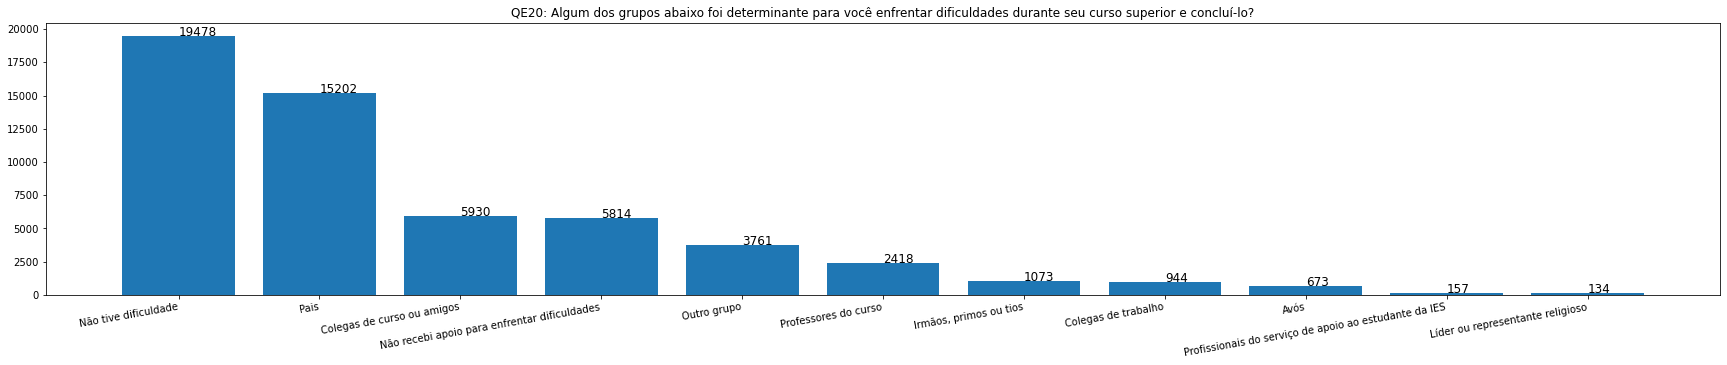

In [197]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I20[x] for x in  list(df26.QE_I20.value_counts().index)], df26.QE_I20.value_counts())
for index in range(len(df26.QE_I20.value_counts().index)):
    plt.text([dict_QE_I20[x] for x in  list(df26.QE_I20.value_counts().index)][index], df26.QE_I20.value_counts()[index], df26.QE_I20.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE20: Algum dos grupos abaixo foi determinante para você enfrentar dificuldades durante seu curso superior e concluí-lo?')
ax = ax

## Arquivo 27

- QE_I21

In [198]:
info.iloc[26][1]

'Edição, código de curso e QE21: Alguém em sua família concluiu um curso superior?'

In [199]:
df27 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq27.txt', sep=';')

In [200]:
df27 = df27[df27['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [201]:
df27

,NU_ANO,CO_CURSO,QE_I21
0,2021,121131,A
1,2021,1166010,A
2,2021,101127,A
3,2021,1187671,A
4,2021,123530,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [202]:
df27.QE_I21.isna().sum()

11180

In [203]:
df27.QE_I21.value_counts()

A    39131
B    16452
Name: QE_I21, dtype: int64

In [204]:
dict_QE_I21 = {'A': 'Sim',
               'B': 'Não'
              }

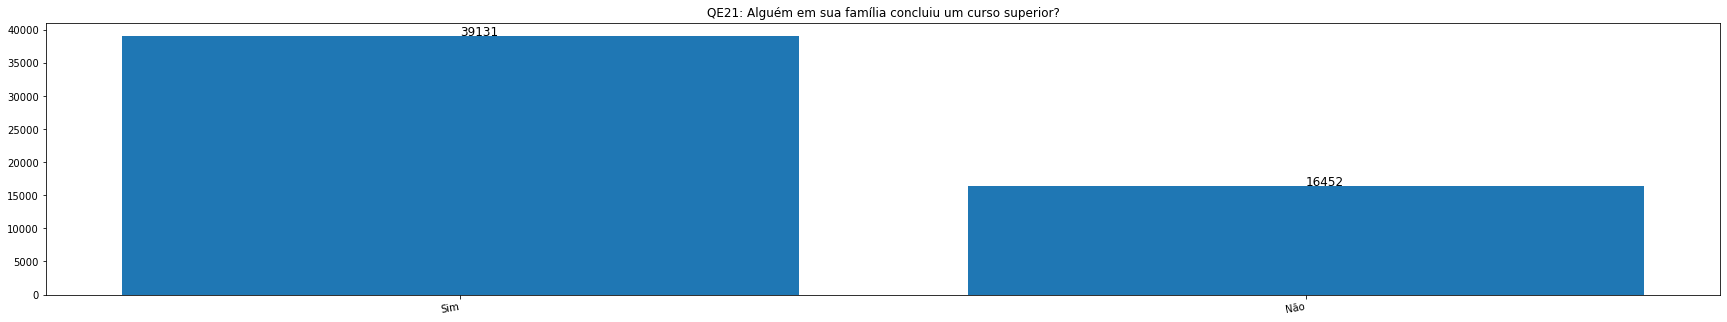

In [205]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I21[x] for x in  list(df27.QE_I21.value_counts().index)], df27.QE_I21.value_counts())
for index in range(len(df27.QE_I21.value_counts().index)):
    plt.text([dict_QE_I21[x] for x in  list(df27.QE_I21.value_counts().index)][index], df27.QE_I21.value_counts()[index], df27.QE_I21.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE21: Alguém em sua família concluiu um curso superior?')
ax = ax

## Arquivo 28

- QE_I22

In [206]:
info.iloc[27][1]

'Edição, código de curso e QE22: Excetuando-se os livros indicados na bibliografia do seu curso, quantos livros você leu neste ano?'

In [207]:
df28 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq28.txt', sep=';')

In [208]:
df28 = df28[df28['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [209]:
df28

,NU_ANO,CO_CURSO,QE_I22
0,2021,1187671,A
1,2021,13595,A
2,2021,1427414,A
3,2021,1119382,A
4,2021,53520,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [210]:
df28.QE_I22.isna().sum()

11179

In [211]:
df28.QE_I22.value_counts()

B    21849
A    15056
C    12011
E     3699
D     2969
Name: QE_I22, dtype: int64

In [212]:
dict_QE_I22 = {'A': 'Nenhum',
               'B': 'Um ou dois',
               'C': 'De três a cinco',
               'D': 'De seis a oito',
               'E': 'Mais de oito'
              }

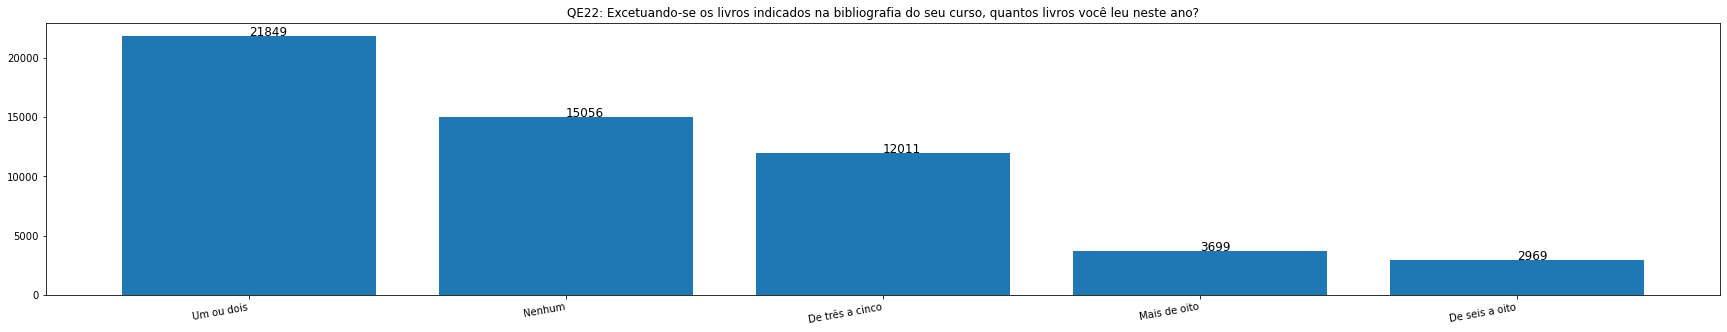

In [213]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I22[x] for x in  list(df28.QE_I22.value_counts().index)], df28.QE_I22.value_counts())
for index in range(len(df28.QE_I22.value_counts().index)):
    plt.text([dict_QE_I22[x] for x in  list(df28.QE_I22.value_counts().index)][index], df28.QE_I22.value_counts()[index], df28.QE_I22.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE22: Excetuando-se os livros indicados na bibliografia do seu curso, quantos livros você leu neste ano?')
ax = ax

## Arquivo 29

- QE_I23

In [214]:
info.iloc[28][1]

'Edição, código de curso e QE23: Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'

In [215]:
df29 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq29.txt', sep=';')

In [216]:
df29 = df29[df29['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [217]:
df29

,NU_ANO,CO_CURSO,QE_I23
0,2021,1119473,A
1,2021,1427414,A
2,2021,1119382,A
3,2021,53520,A
4,2021,1170053,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [218]:
df29.QE_I23.isna().sum()

11182

In [219]:
df29.QE_I23.value_counts()

B    22984
C    16213
D     6481
E     5419
A     4484
Name: QE_I23, dtype: int64

In [220]:
dict_QE_I23 = {'A': 'Nenhuma, apenas assisto às aulas',
               'B': 'De uma a três',
               'C': 'De quatro a sete',
               'D': 'De oito a doze',
               'E': 'Mais de doze'
              }

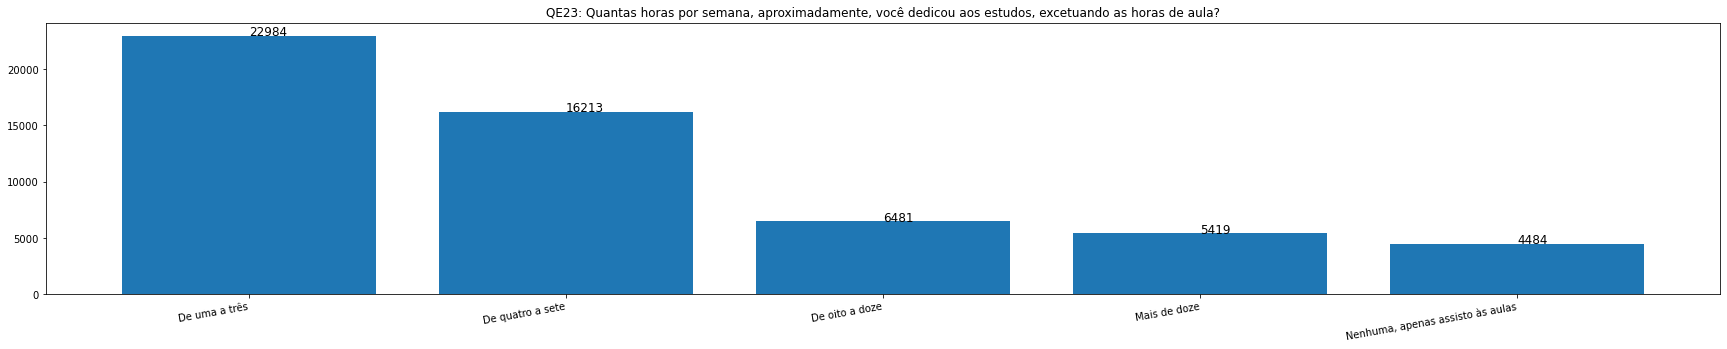

In [221]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I23[x] for x in  list(df29.QE_I23.value_counts().index)], df29.QE_I23.value_counts())
for index in range(len(df29.QE_I23.value_counts().index)):
    plt.text([dict_QE_I23[x] for x in  list(df29.QE_I23.value_counts().index)][index], df29.QE_I23.value_counts()[index], df29.QE_I23.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE23: Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?')
ax = ax

## Arquivo 30

- QE_I24

In [222]:
info.iloc[29][1]

'Edição, código de curso e QE24: Você teve oportunidade de aprendizado de idioma estrangeiro na Instituição?'

In [223]:
df30 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq30.txt', sep=';')

In [224]:
df30 = df30[df30['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [225]:
df30

,NU_ANO,CO_CURSO,QE_I24
0,2021,121131,A
1,2021,13595,A
2,2021,1321335,A
3,2021,1364335,A
4,2021,1150279,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [226]:
df30.QE_I24.isna().sum()

11184

In [227]:
df30.QE_I24.value_counts()

E    34498
A    10003
D     6475
C     4004
B      599
Name: QE_I24, dtype: int64

In [228]:
dict_QE_I24 = {'A': 'Sim, somente na modalidade presencial',
               'B': 'Sim, somente na modalidade semipresencial',
               'C': 'Sim, parte na modalidade presencial e parte na modalidade semipresencial',
               'D': 'Sim, na modalidade a distância',
               'E': 'Não'
              }

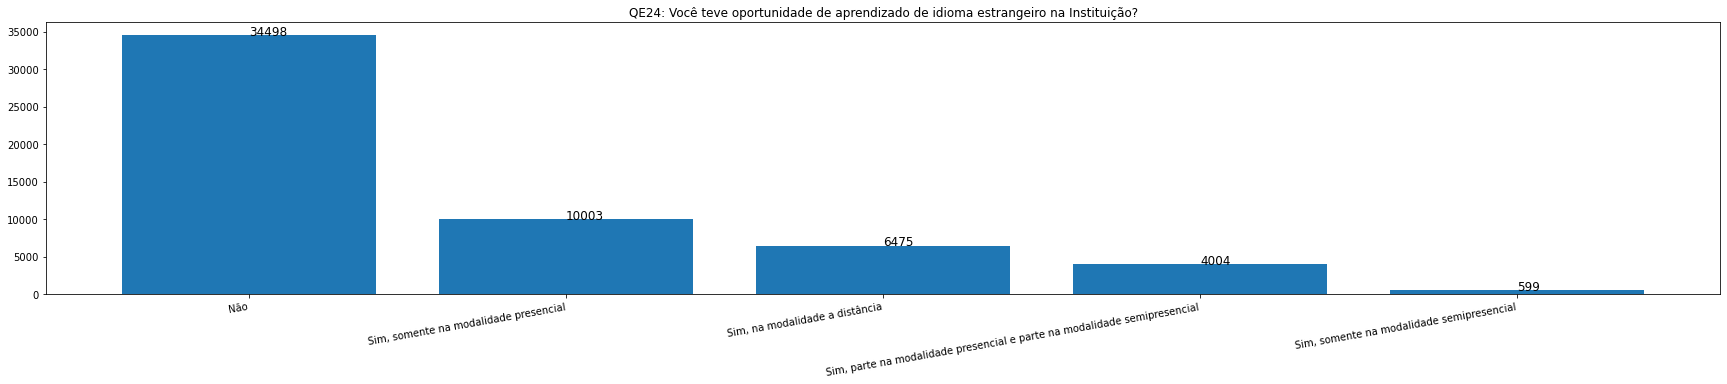

In [229]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I24[x] for x in  list(df30.QE_I24.value_counts().index)], df30.QE_I24.value_counts())
for index in range(len(df30.QE_I24.value_counts().index)):
    plt.text([dict_QE_I24[x] for x in  list(df30.QE_I24.value_counts().index)][index], df30.QE_I24.value_counts()[index], df30.QE_I24.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE24: Você teve oportunidade de aprendizado de idioma estrangeiro na Instituição?')
ax = ax

## Arquivo 31

- QE_I25 

In [230]:
info.iloc[30][1]

'Edição, código de curso e QE25: Qual o principal motivo para você ter escolhido este curso?'

In [231]:
df31 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq31.txt', sep=';')

In [232]:
df31 = df31[df31['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [233]:
df31

,NU_ANO,CO_CURSO,QE_I25
0,2021,121131,A
1,2021,123530,A
2,2021,1153739,A
3,2021,1427414,A
4,2021,1454405,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [234]:
df31.QE_I25.isna().sum()

11183

In [235]:
df31.QE_I25.value_counts()

A    19151
E    15368
C    10154
H     6879
B     2203
F     1233
G      443
D      149
Name: QE_I25, dtype: int64

In [236]:
dict_QE_I25 = {'A': 'Inserção no mercado de trabalho',
               'B': 'Influência familiar',
               'C': 'Valorização profissional',
               'D': 'Prestígio Social',
               'E': 'Vocação',
               'F': 'Oferecido na modalidade a distância',
               'G': 'Baixa concorrência para ingresso',
               'H': 'Outro motivo'
              }

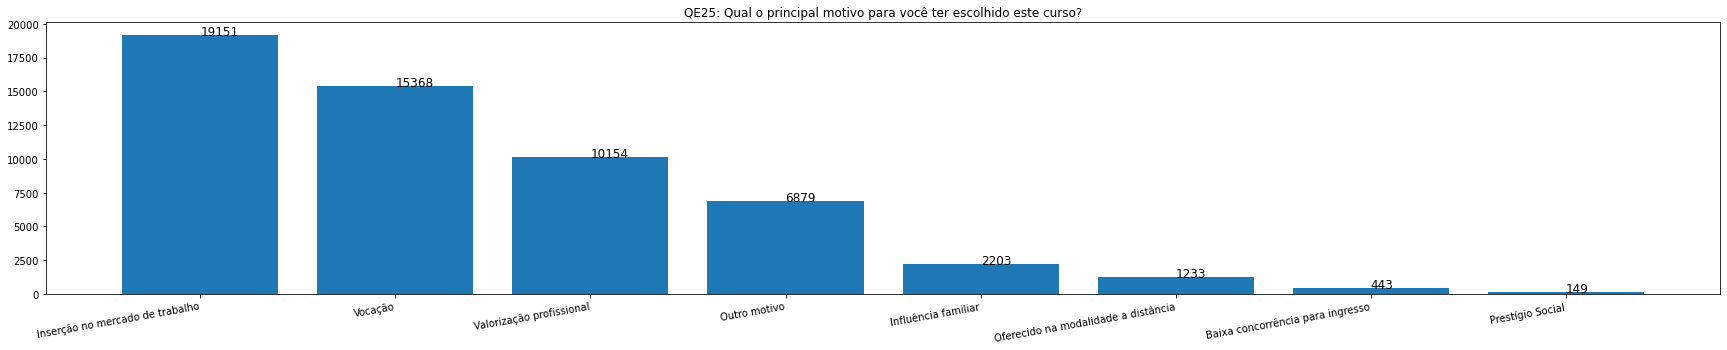

In [237]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I25[x] for x in  list(df31.QE_I25.value_counts().index)], df31.QE_I25.value_counts())
for index in range(len(df31.QE_I25.value_counts().index)):
    plt.text([dict_QE_I25[x] for x in  list(df31.QE_I25.value_counts().index)][index], df31.QE_I25.value_counts()[index], df31.QE_I25.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE25: Qual o principal motivo para você ter escolhido este curso?')
ax = ax

## Arquivo 32

- QE_I26

In [238]:
info.iloc[31][1]

'Edição, código de curso e QE26: Qual a principal razão para você ter escolhido a sua instituição de educação superior?'

In [239]:
df32 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq32.txt', sep=';')

In [240]:
df32 = df32[df32['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [241]:
df32

,NU_ANO,CO_CURSO,QE_I26
0,2021,101127,A
1,2021,1187671,A
2,2021,1427414,A
3,2021,42461,A
4,2021,1150279,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [242]:
df32.QE_I26.isna().sum()

11183

In [243]:
df32.QE_I26.value_counts()

F    17100
B     9645
A     8768
C     7072
I     4155
E     3602
H     3207
G     1059
D      972
Name: QE_I26, dtype: int64

In [244]:
dict_QE_I26 = {'A': 'Gratuidade',
               'B': 'Preço da mensalidade',
               'C': 'Proximidade da minha residência',
               'D': 'Proximidade do meu trabalho',
               'E': 'Facilidade de acesso',
               'F': 'Qualidade/reputação',
               'G': 'Foi a única onde tive aprovação',
               'H': 'Possibilidade de ter bolsa de estudo',
               'I': 'Outro motivo'
              }

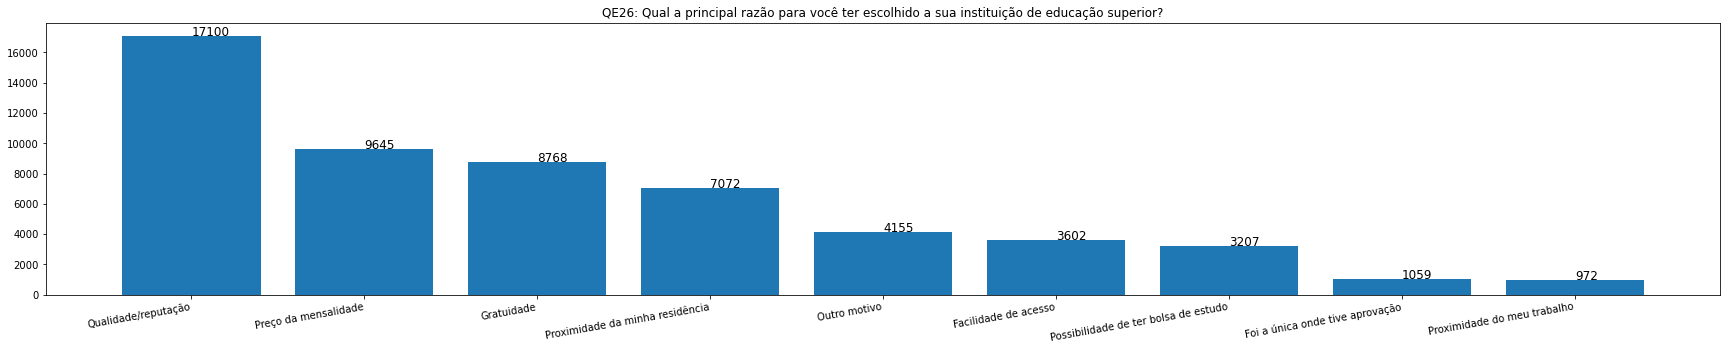

In [245]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I26[x] for x in  list(df32.QE_I26.value_counts().index)], df32.QE_I26.value_counts())
for index in range(len(df32.QE_I26.value_counts().index)):
    plt.text([dict_QE_I26[x] for x in  list(df32.QE_I26.value_counts().index)][index], df32.QE_I26.value_counts()[index], df32.QE_I26.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE26: Qual a principal razão para você ter escolhido a sua instituição de educação superior?')
ax = ax

## Arquivo 33

In [246]:
info.iloc[32][1]

'Edição, código de curso e QE69: Você pretende exercer o magistério após o término do curso?'

In [247]:
df33 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq33.txt', sep=';')

In [248]:
df33 = df33[df33['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [249]:
df33

,NU_ANO,CO_CURSO,QE_I69
0,2021,1404959,A
1,2021,1487056,A
2,2021,121564,A
3,2021,1127560,A
4,2021,1166493,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [250]:
df33.QE_I69.isna().sum()

65034

In [251]:
df33.QE_I69.value_counts()

A    670
D    454
B    441
C    164
Name: QE_I69, dtype: int64

In [252]:
dict_QE_I69 = {'A': 'Sim, como atuação profissional principal',
               'B': 'Sim, mas esta não será a minha atuação profissional principal',
               'C': 'Não',
               'D': 'Ainda não decidi'
              }

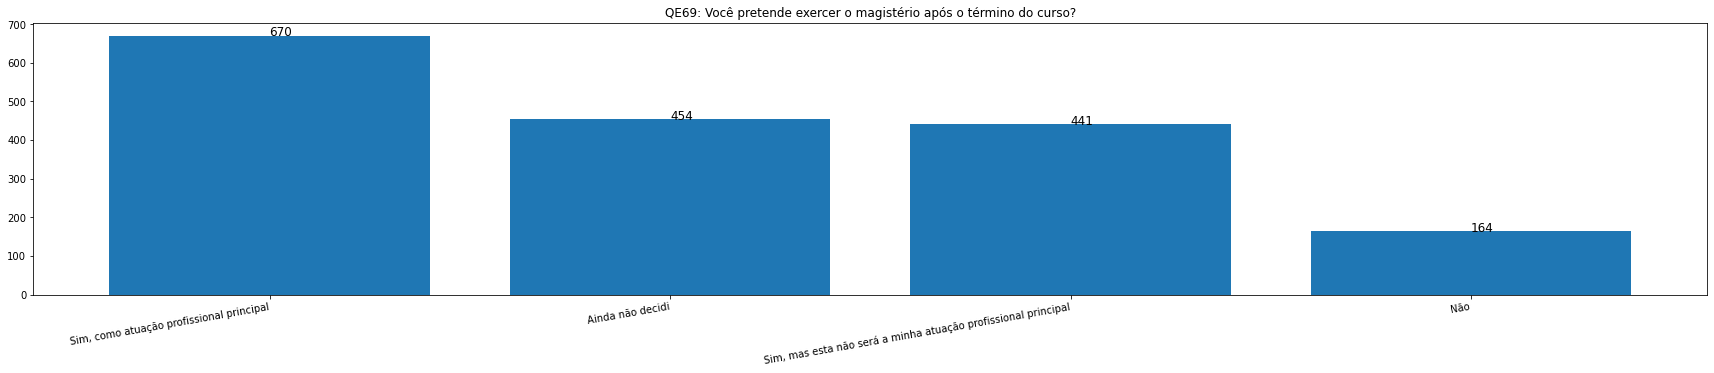

In [253]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I69[x] for x in  list(df33.QE_I69.value_counts().index)], df33.QE_I69.value_counts())
for index in range(len(df33.QE_I69.value_counts().index)):
    plt.text([dict_QE_I69[x] for x in  list(df33.QE_I69.value_counts().index)][index], df33.QE_I69.value_counts()[index], df33.QE_I69.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE69: Você pretende exercer o magistério após o término do curso?')
ax = ax

## Arquivo 34

In [254]:
info.iloc[33][1]

'Edição, código de curso e QE70: Qual a principal razão para você ter escolhido a Licenciatura?'

In [255]:
df34 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq34.txt', sep=';')

In [256]:
df34 = df34[df34['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [257]:
df34

,NU_ANO,CO_CURSO,QE_I70
0,2021,82654,A
1,2021,121564,A
2,2021,1166493,A
3,2021,1203266,A
4,2021,1399169,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [258]:
df34.QE_I70.isna().sum()

65034

In [259]:
df34.QE_I70.value_counts()

B    323
A    306
E    282
J    204
C    192
H    124
D    114
F     84
G     65
I     35
Name: QE_I70, dtype: int64

In [260]:
dict_QE_I70 = {'A': 'Acredito ser minha vocação',
               'B': 'Importância da profissão',
               'C': 'Tive professores que me inspiraram',
               'D': 'É uma boa carreira',
               'E': 'É uma opção alternativa de atividade profissional',
               'F': 'Não tive condições financeiras de frequentar outro curso',
               'G': 'Facilidade de acesso ao local do curso',
               'H': 'Não havia oferta de bacharelado na área',
               'I': 'Influência da família',
               'J': 'Outra razão'
              }

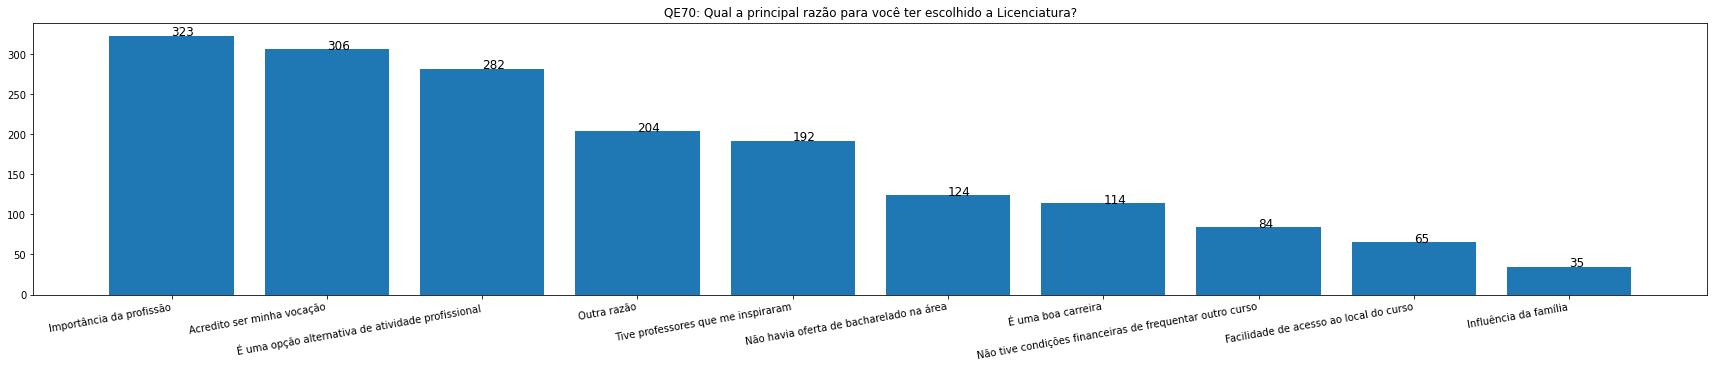

In [261]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I70[x] for x in  list(df34.QE_I70.value_counts().index)], df34.QE_I70.value_counts())
for index in range(len(df34.QE_I70.value_counts().index)):
    plt.text([dict_QE_I70[x] for x in  list(df34.QE_I70.value_counts().index)][index], df34.QE_I70.value_counts()[index], df34.QE_I70.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE70: Qual a principal razão para você ter escolhido a Licenciatura?')
ax = ax

## Arquivo 35

In [262]:
info.iloc[34][1]

'Edição, código de curso e QE71: Você já tem experiência profissional no magistério? Qual a forma de contrato? Assinale a alternativa\nmais relevante para você.'

In [263]:
df35 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq35.txt', sep=';')

In [264]:
df35 = df35[df35['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [265]:
df35

,NU_ANO,CO_CURSO,QE_I71
0,2021,82654,A
1,2021,1487056,A
2,2021,1404959,A
3,2021,1399169,A
4,2021,1399169,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [266]:
df35.QE_I71.isna().sum()

65034

In [267]:
df35.QE_I71.value_counts()

I    869
B    208
H    174
A    153
G    130
F    116
E     63
C      9
D      7
Name: QE_I71, dtype: int64

In [268]:
dict_QE_I71 = {'A': 'Sim, em escola pública, como concursado',
               'B': 'Sim, em escola pública, com contrato temporário (não concursado)',
               'C': 'Sim, em escola privada comunitária como contratado',
               'D': 'Sim, em escola privada confessional como contratado',
               'E': 'Sim, em escola privada particular como contratado',
               'F': 'Sim, em cursos livres (idiomas, informática, aulas particulares), como contratado',
               'G': 'Sim, estágio remunerado',
               'H': 'Sim, como voluntário',
               'I': 'Não tenho experiência no magistério'
              }

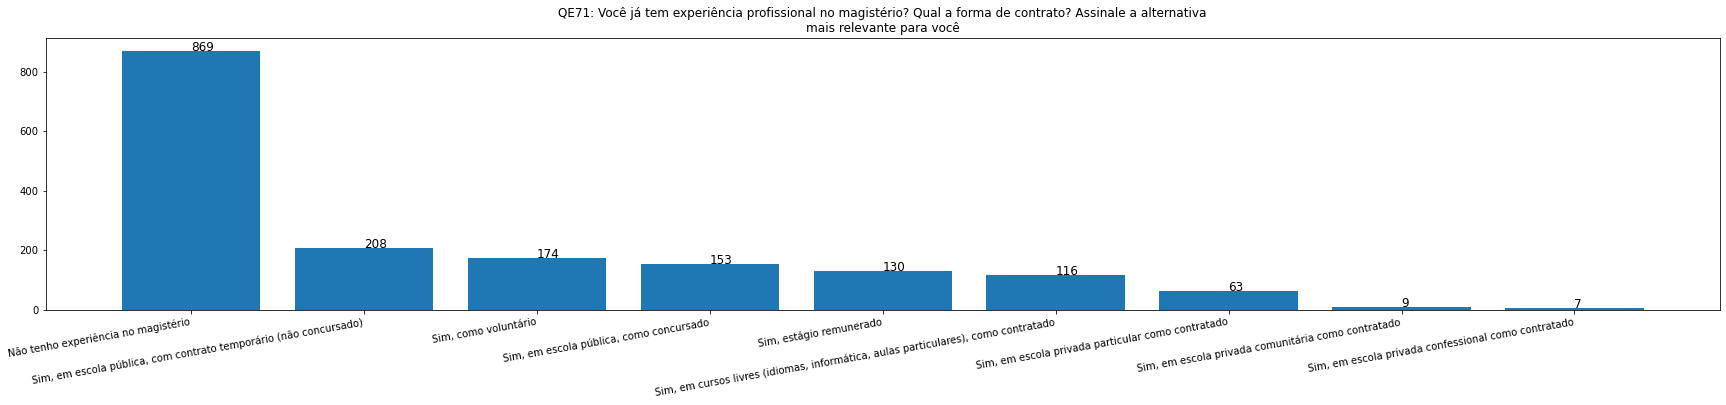

In [269]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I71[x] for x in  list(df35.QE_I71.value_counts().index)], df35.QE_I71.value_counts())
for index in range(len(df35.QE_I71.value_counts().index)):
    plt.text([dict_QE_I71[x] for x in  list(df35.QE_I71.value_counts().index)][index], df35.QE_I71.value_counts()[index], df35.QE_I71.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE71: Você já tem experiência profissional no magistério? Qual a forma de contrato? Assinale a alternativa\nmais relevante para você')
ax = ax

## Arquivo 36

In [270]:
info.iloc[35][1]

'Edição, código de curso e QE72: Se você tem experiência no magistério, em qual etapa/modalidade atuou? Assinale a alternativa\nmais relevante para você.'

In [271]:
df36 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq36.txt', sep=';')

In [272]:
df36 = df36[df36['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [273]:
df36

,NU_ANO,CO_CURSO,QE_I72
0,2021,1487056,A
1,2021,1404959,A
2,2021,1399169,A
3,2021,1487056,A
4,2021,1305552,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [274]:
df36.QE_I72.isna().sum()

65034

In [275]:
df36.QE_I72.value_counts()

I    880
B    170
E    168
C    157
D    150
A     81
F     52
G     36
H     35
Name: QE_I72, dtype: int64

In [276]:
dict_QE_I72 = {'A': 'Educação Infantil',
               'B': 'Ensino Fundamental – anos iniciais',
               'C': 'Ensino Fundamental – anos finais',
               'D': 'Ensino Médio',
               'E': 'Educação Profissional Técnica de Nível Médio ou Médio Integrado',
               'F': 'Educação de Jovens e Adultos',
               'G': 'Ensino Superior',
               'H': 'Outra modalidade de ensino (indígena, quilombola, do campo, especial, entre outras)',
               'I': 'Não tenho experiência no magistério'
              }

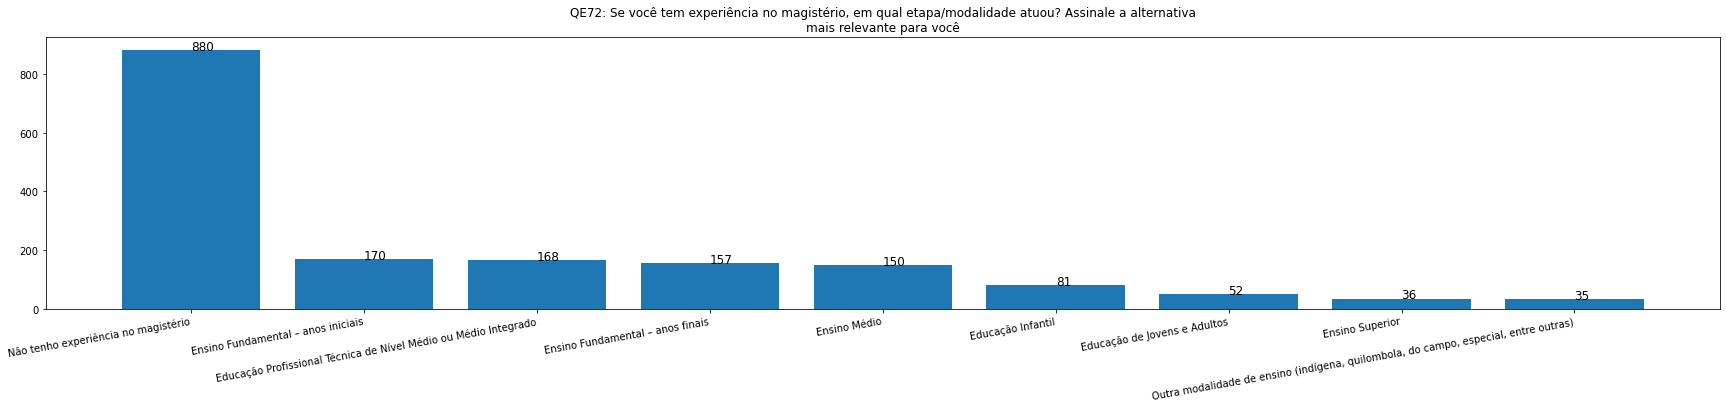

In [277]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I72[x] for x in  list(df36.QE_I72.value_counts().index)], df36.QE_I72.value_counts())
for index in range(len(df36.QE_I72.value_counts().index)):
    plt.text([dict_QE_I72[x] for x in  list(df36.QE_I72.value_counts().index)][index], df36.QE_I72.value_counts()[index], df36.QE_I72.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE72: Se você tem experiência no magistério, em qual etapa/modalidade atuou? Assinale a alternativa\nmais relevante para você')
ax = ax

## Arquivo 37

In [278]:
info.iloc[36][1]

'Edição, código de curso e QE73: Em que instituição você realizou seu estágio curricular obrigatório? '

In [279]:
df37 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq37.txt', sep=';')

In [280]:
df37 = df37[df37['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [281]:
df37

,NU_ANO,CO_CURSO,QE_I73
0,2021,82654,A
1,2021,123336,A
2,2021,1127560,A
3,2021,1404959,A
4,2021,1127560,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [282]:
df37.QE_I73.isna().sum()

65034

In [283]:
df37.QE_I73.value_counts()

A    1376
F     179
E      83
D      80
C       6
B       5
Name: QE_I73, dtype: int64

In [284]:
dict_QE_I73 = {'A': 'Escola pública',
               'B': 'Escola privada comunitária',
               'C': 'Escola privada confessional',
               'D': 'Escola privada particular',
               'E': 'Em outro tipo de instituição não especificado',
               'F': 'Não realizei o estágio curricular obrigatório'
              }

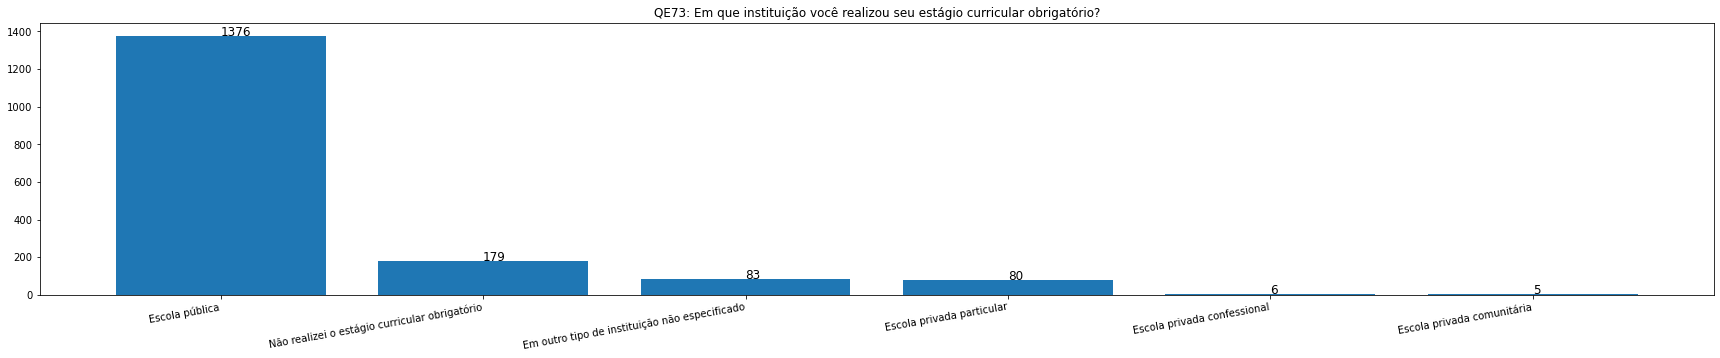

In [285]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I73[x] for x in  list(df37.QE_I73.value_counts().index)], df37.QE_I73.value_counts())
for index in range(len(df37.QE_I73.value_counts().index)):
    plt.text([dict_QE_I73[x] for x in  list(df37.QE_I73.value_counts().index)][index], df37.QE_I73.value_counts()[index], df37.QE_I73.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE73: Em que instituição você realizou seu estágio curricular obrigatório?')
ax = ax

## Arquivo 38

In [286]:
info.iloc[37][1]

'Edição, código de curso e QE74: Em qual turno você realizou o estágio curricular obrigatório?'

In [287]:
df38 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq38.txt', sep=';')

In [288]:
df38 = df38[df38['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [289]:
df38

,NU_ANO,CO_CURSO,QE_I74
0,2021,1127560,A
1,2021,1127560,A
2,2021,1487056,A
3,2021,1404959,A
4,2021,1305552,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [290]:
df38.QE_I74.isna().sum()

65034

In [291]:
df38.QE_I74.value_counts()

A    631
B    465
C    234
D    214
E    185
Name: QE_I74, dtype: int64

In [292]:
dict_QE_I74 = {'A': 'Matutino',
               'B': 'Vespertino',
               'C': 'Noturno',
               'D': 'Integral',
               'E': 'Não realizei o estágio curricular obrigatório'
              }

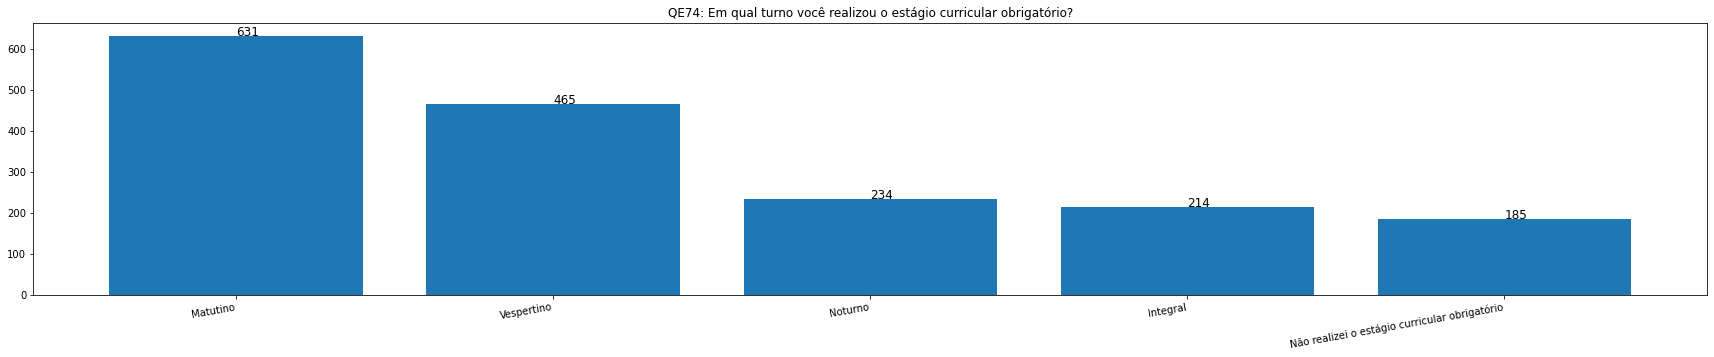

In [293]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I74[x] for x in  list(df38.QE_I74.value_counts().index)], df38.QE_I74.value_counts())
for index in range(len(df38.QE_I74.value_counts().index)):
    plt.text([dict_QE_I74[x] for x in  list(df38.QE_I74.value_counts().index)][index], df38.QE_I74.value_counts()[index], df38.QE_I74.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE74: Em qual turno você realizou o estágio curricular obrigatório?')
ax = ax

## Arquivo 39

In [294]:
info.iloc[38][1]

'Edição, código de curso e QE75: Em qual etapa/modalidade de ensino você realizou seu estágio curricular obrigatório?'

In [295]:
df39 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq39.txt', sep=';')

In [296]:
df39 = df39[df39['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [297]:
df39

,NU_ANO,CO_CURSO,QE_I75
0,2021,1404959,A
1,2021,1305552,A
2,2021,1305552,A
3,2021,1305552,A
4,2021,1117715,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [298]:
df39.QE_I75.isna().sum()

65034

In [299]:
df39.QE_I75.value_counts()

D    485
C    378
B    249
E    210
I    183
A     91
F     74
H     49
G     10
Name: QE_I75, dtype: int64

In [300]:
dict_QE_I75 = {'A': 'Educação Infantil',
               'B': 'Ensino Fundamental – anos iniciais',
               'C': 'Ensino Fundamental – anos finais',
               'D': 'Ensino Médio',
               'E': 'Educação Profissional Técnica de Nível Médio ou Médio Integrado',
               'F': 'Educação de Jovens e Adultos',
               'G': 'Outra modalidade de ensino (indígena, quilombola, do campo, especial, entre outras)',
               'H': 'Em atividades escolares de natureza complementar (atendimento especializado, atividade de apoio, atividades artísticas, atividades esportivas)',
               'I': 'Não realizei estágio curricular obrigatório'
              }

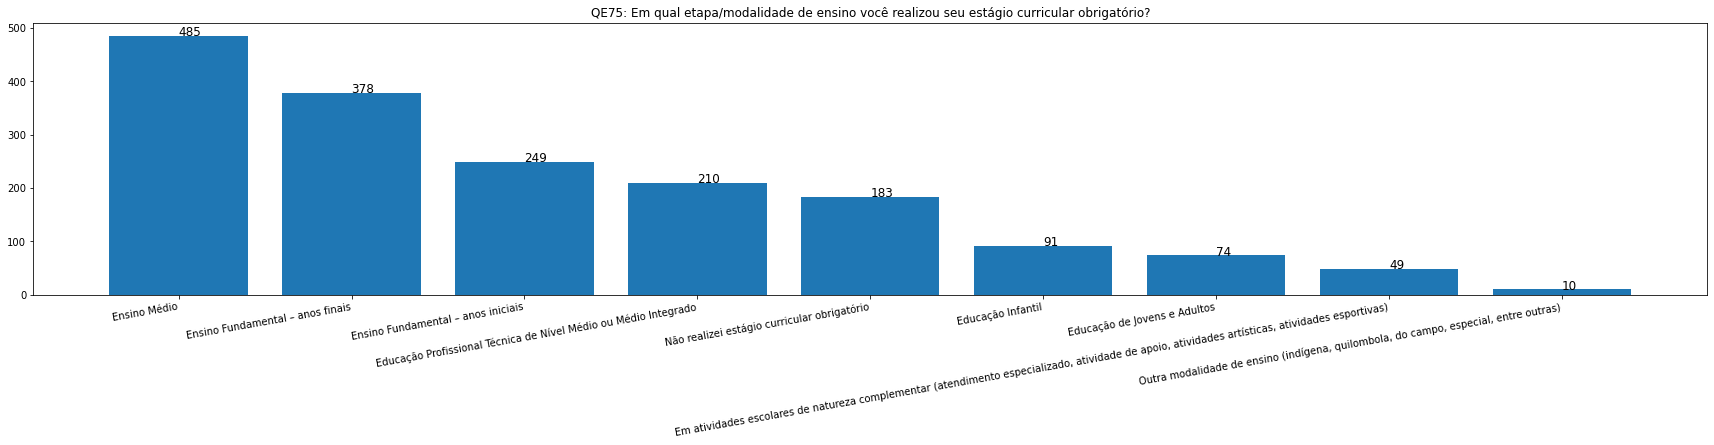

In [301]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I75[x] for x in  list(df39.QE_I75.value_counts().index)], df39.QE_I75.value_counts())
for index in range(len(df39.QE_I75.value_counts().index)):
    plt.text([dict_QE_I75[x] for x in  list(df39.QE_I75.value_counts().index)][index], df39.QE_I75.value_counts()[index], df39.QE_I75.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE75: Em qual etapa/modalidade de ensino você realizou seu estágio curricular obrigatório?')
ax = ax

## Arquivo 40

In [302]:
info.iloc[39][1]

'Edição, código de curso e QE76: Quantas horas de estágio curricular obrigatório você integralizou?'

In [303]:
df40 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq40.txt', sep=';')

In [304]:
df40 = df40[df40['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [305]:
df40

,NU_ANO,CO_CURSO,QE_I76
0,2021,1404959,A
1,2021,1127560,A
2,2021,1305552,A
3,2021,98984,A
4,2021,1127560,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [306]:
df40.QE_I76.isna().sum()

65034

In [307]:
df40.QE_I76.value_counts()

D    463
E    331
B    307
A    245
C    204
F    179
Name: QE_I76, dtype: int64

In [308]:
dict_QE_I76 = {'A': 'Até 100',
               'B': 'De 101 a 200',
               'C': 'De 201 a 300',
               'D': 'De 301 a 400',
               'E': 'Mais de 400o',
               'F': 'Não realizei estágio curricular obrigatório'
              }

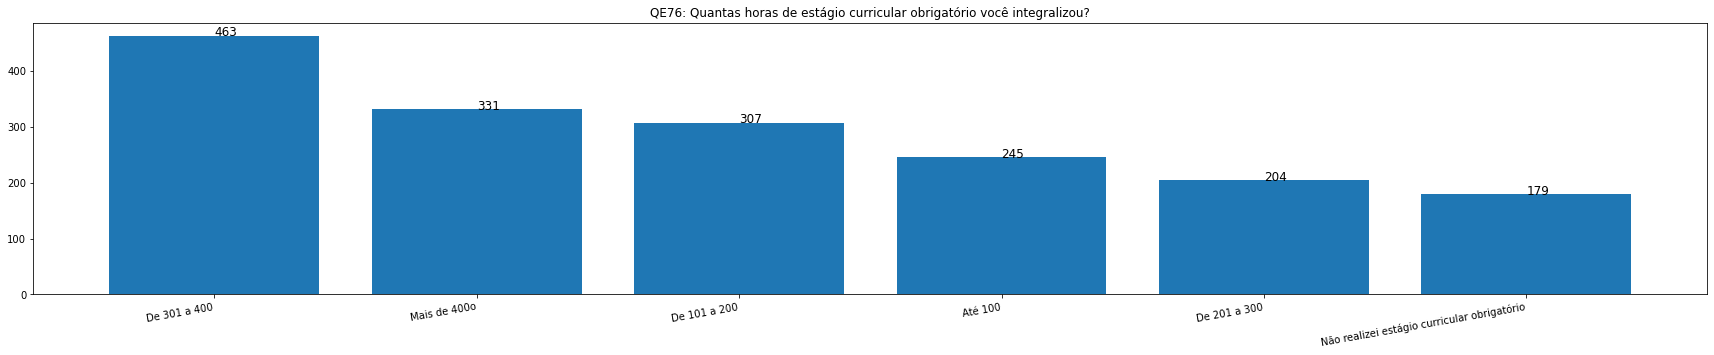

In [309]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I76[x] for x in  list(df40.QE_I76.value_counts().index)], df40.QE_I76.value_counts())
for index in range(len(df40.QE_I76.value_counts().index)):
    plt.text([dict_QE_I76[x] for x in  list(df40.QE_I76.value_counts().index)][index], df40.QE_I76.value_counts()[index], df40.QE_I76.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE76: Quantas horas de estágio curricular obrigatório você integralizou?')
ax = ax

## Arquivo 41

In [310]:
info.iloc[40][1]

'Edição, código de curso e QE77: Onde você pretende atuar daqui a cinco anos?'

In [311]:
df41 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq41.txt', sep=';')

In [312]:
df41 = df41[df41['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [313]:
df41

,NU_ANO,CO_CURSO,QE_I77
0,2021,82654,A
1,2021,1127560,A
2,2021,1404959,A
3,2021,1399169,A
4,2021,1487056,A
...,...,...,...
66758,2021,123336,NaN
66759,2021,123336,NaN
66760,2021,123336,NaN
66761,2021,123336,NaN


In [314]:
df41.QE_I77.isna().sum()

65034

In [315]:
df41.QE_I77.value_counts()

A    780
E    522
C    255
B     99
D     73
Name: QE_I77, dtype: int64

In [316]:
dict_QE_I77 = {'A': 'Em escola pública, como professor',
               'B': 'Em escola privada, como professor',
               'C': 'Em escola/instituição pública, na gestão educacional',
               'D': 'Em escola/instituição privada, na gestão educaciona',
               'E': 'Em outro campo de atuação profissional não vinculado à educação'
              }

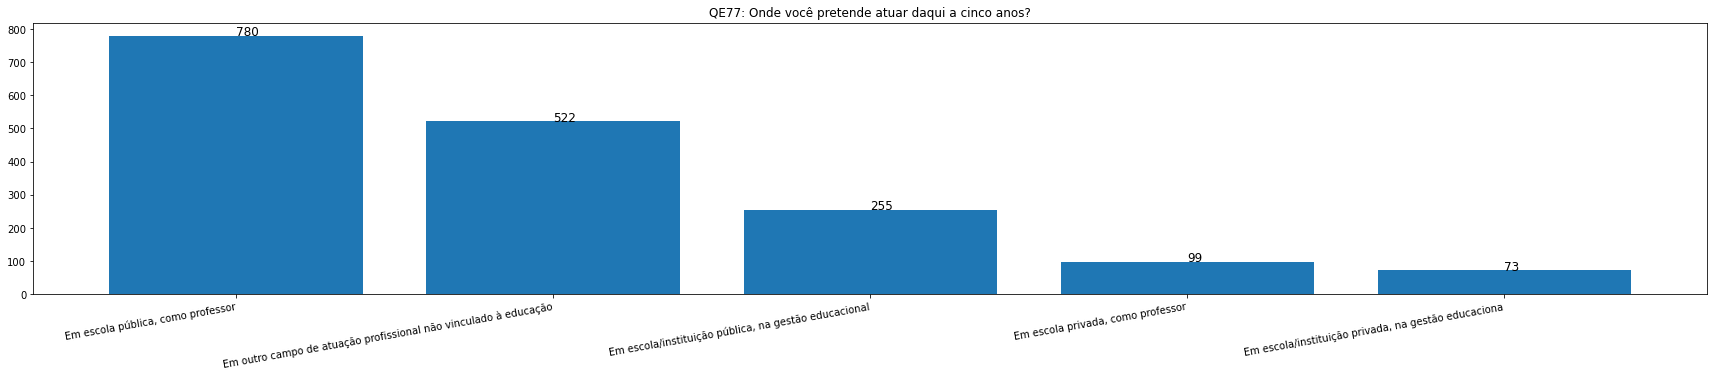

In [317]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I77[x] for x in  list(df41.QE_I77.value_counts().index)], df41.QE_I77.value_counts())
for index in range(len(df41.QE_I77.value_counts().index)):
    plt.text([dict_QE_I77[x] for x in  list(df41.QE_I77.value_counts().index)][index], df41.QE_I77.value_counts()[index], df41.QE_I77.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE77: Onde você pretende atuar daqui a cinco anos?')
ax = ax

## Arquivo 42

In [318]:
info.iloc[41][1]

'Edição, código de curso e questões de licenciatura referentes à opinião do estudante quanto ao curso'

In [319]:
df42 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq42.txt', sep=';')

C:\Users\rafae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [320]:
df42 = df42[df42['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [321]:
df42

,NU_ANO,CO_CURSO,QE_I78,QE_I79,QE_I80,QE_I81
0,2021,123336,A,A,A,A
1,2021,1127560,A,A,A,A
2,2021,1487056,A,B,B,B
3,2021,1399169,A,B,B,B
4,2021,98984,A,A,A,C
...,...,...,...,...,...,...
66758,2021,123336,NaN,NaN,NaN,NaN
66759,2021,123336,NaN,NaN,NaN,NaN
66760,2021,123336,NaN,NaN,NaN,NaN
66761,2021,123336,NaN,NaN,NaN,NaN


In [322]:
df42.QE_I78.isna().sum()

65034

In [323]:
df42.QE_I78.value_counts()

B    781
A    704
C    217
D     27
Name: QE_I78, dtype: int64

In [324]:
df42.QE_I79.value_counts()

B    831
A    483
C    366
D     49
Name: QE_I79, dtype: int64

In [325]:
df42.QE_I80.value_counts()

A    789
B    617
C    202
D    121
Name: QE_I80, dtype: int64

In [326]:
df42.QE_I81.value_counts()

A    817
B    602
C    177
D    133
Name: QE_I81, dtype: int64

In [327]:
dict_QE_I78 = {'A': 'Sim, completamente',
               'B': 'Sim, em grande parte',
               'C': 'Apenas em algumas disciplinas/situações',
               'D': 'Não'
              }

In [328]:
dict_QE_I79 = {'A': 'Sim, durante todo o tempo',
               'B': 'Sim, em grande parte do tempo',
               'C': 'Apenas em algumas disciplinas/situações',
               'D': 'Não'
              }

In [329]:
dict_QE_I80 = {'A': 'Sim, durante todo o tempo',
               'B': 'Sim, em grande parte do tempo',
               'C': 'Apenas em algumas disciplinas/situações',
               'D': 'Não'
              }

In [330]:
dict_QE_I81 = {'A': 'Sim, durante todo o tempo',
               'B': 'Sim, em grande parte do tempo',
               'C': 'Apenas em algumas disciplinas/situações',
               'D': 'Não'
              }

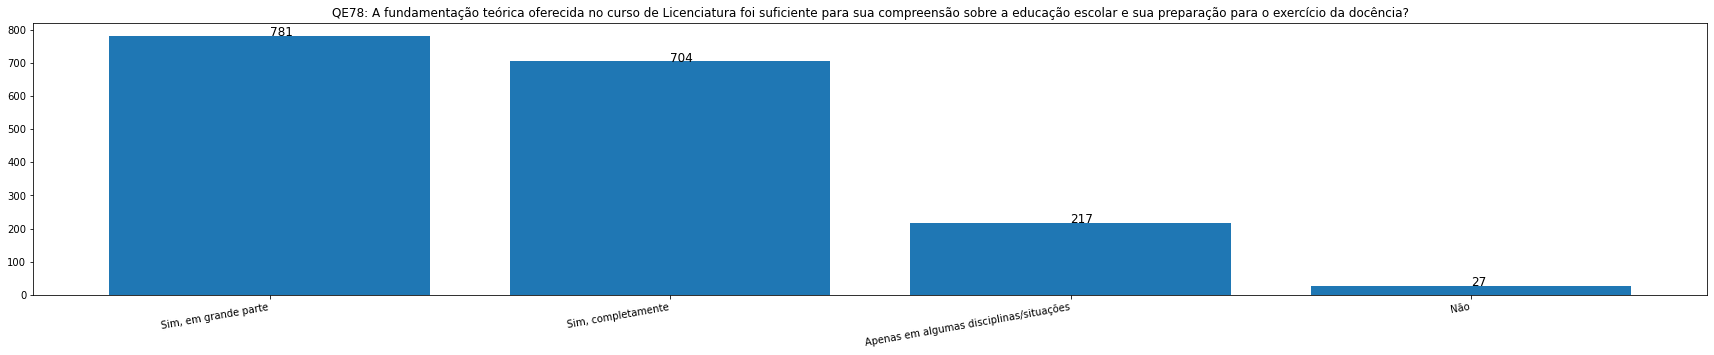

In [331]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I78[x] for x in  list(df42.QE_I78.value_counts().index)], df42.QE_I78.value_counts())
for index in range(len(df42.QE_I78.value_counts().index)):
    plt.text([dict_QE_I78[x] for x in  list(df42.QE_I78.value_counts().index)][index], df42.QE_I78.value_counts()[index], df42.QE_I78.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE78: A fundamentação teórica oferecida no curso de Licenciatura foi suficiente para sua compreensão sobre a educação escolar e sua preparação para o exercício da docência?')
ax = ax

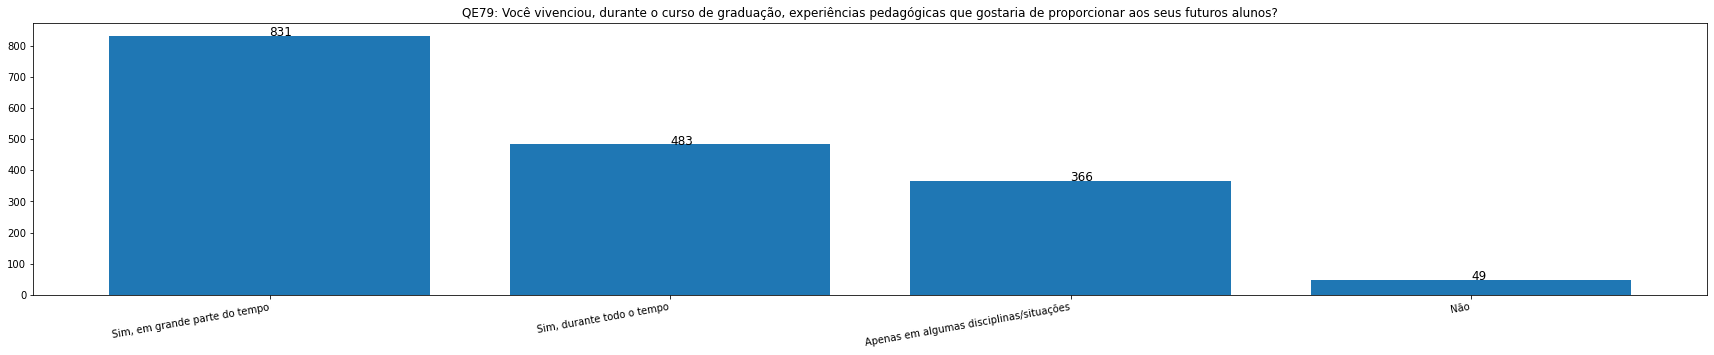

In [332]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I79[x] for x in  list(df42.QE_I79.value_counts().index)], df42.QE_I79.value_counts())
for index in range(len(df42.QE_I79.value_counts().index)):
    plt.text([dict_QE_I79[x] for x in  list(df42.QE_I79.value_counts().index)][index], df42.QE_I79.value_counts()[index], df42.QE_I79.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE79: Você vivenciou, durante o curso de graduação, experiências pedagógicas que gostaria de proporcionar aos seus futuros alunos?')
ax = ax

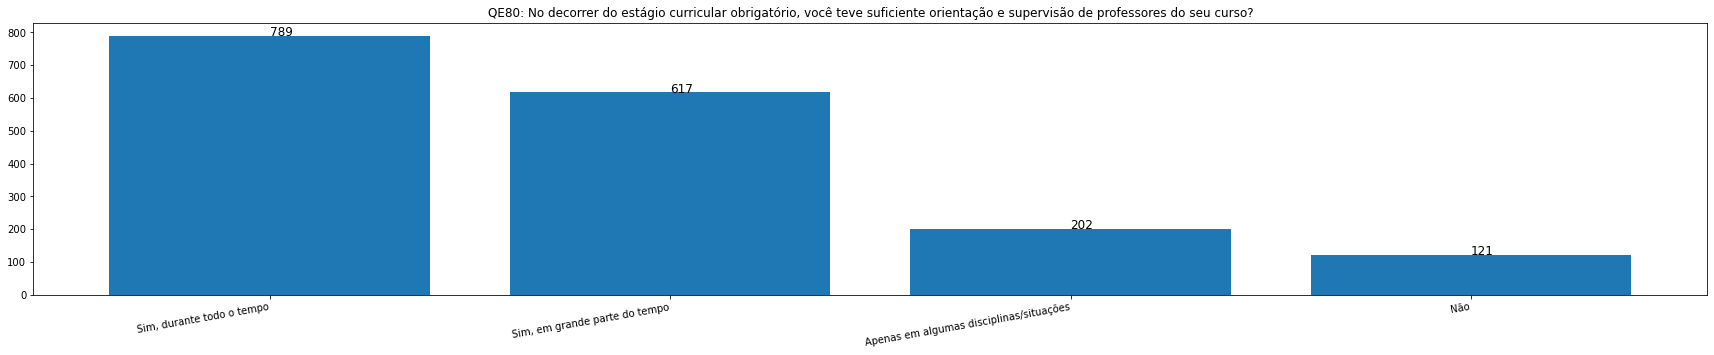

In [333]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I80[x] for x in  list(df42.QE_I80.value_counts().index)], df42.QE_I80.value_counts())
for index in range(len(df42.QE_I80.value_counts().index)):
    plt.text([dict_QE_I80[x] for x in  list(df42.QE_I80.value_counts().index)][index], df42.QE_I80.value_counts()[index], df42.QE_I80.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE80: No decorrer do estágio curricular obrigatório, você teve suficiente orientação e supervisão de professores do seu curso?')
ax = ax

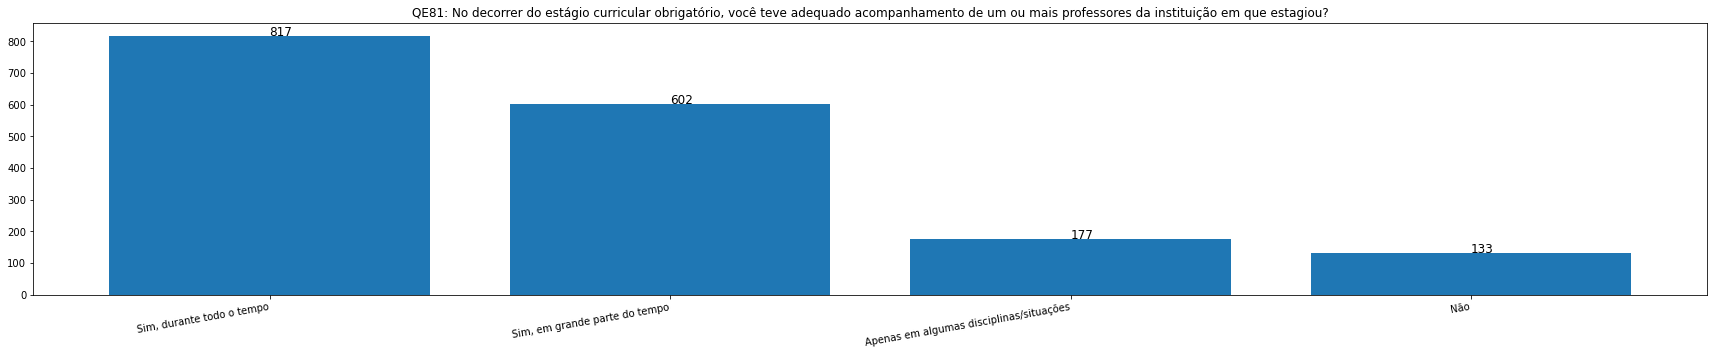

In [334]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I81[x] for x in  list(df42.QE_I81.value_counts().index)], df42.QE_I81.value_counts())
for index in range(len(df42.QE_I81.value_counts().index)):
    plt.text([dict_QE_I81[x] for x in  list(df42.QE_I81.value_counts().index)][index], df42.QE_I81.value_counts()[index], df42.QE_I81.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE81: No decorrer do estágio curricular obrigatório, você teve adequado acompanhamento de um ou mais professores da instituição em que estagiou?')
ax = ax

## Arquivo 43

In [335]:
info.iloc[42][1]

'Edição, código de curso e Questionário Complementar - Pandemia'

In [336]:
df43 = pd.read_csv('microdados_enade_2021/microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq43.txt', sep=';')

In [337]:
df43 = df43[df43['CO_CURSO'].isin(cod_tech)].reset_index(drop=True)

In [338]:
df43

,NU_ANO,CO_CURSO,QE_I82,QE_I83,QE_I84,QE_I85,QE_I86,QE_I87,QE_I88,QE_I89,QE_I90,QE_I91,QE_I92
0,2021,3211,1.0,7.0,7.0,7.0,7.0,1.0,1.0,6.0,3.0,3.0,8.0
1,2021,1330719,1.0,1.0,5.0,5.0,3.0,4.0,6.0,2.0,2.0,2.0,3.0
2,2021,1323837,1.0,2.0,7.0,7.0,1.0,3.0,3.0,6.0,6.0,6.0,3.0
3,2021,1452646,1.0,4.0,6.0,7.0,5.0,4.0,4.0,6.0,2.0,5.0,6.0
4,2021,1270730,1.0,4.0,7.0,8.0,8.0,4.0,4.0,5.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66759,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66760,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66761,2021,123336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
df43.QE_I82.isna().sum()

11188

In [340]:
df43.QE_I82.value_counts()

6.0    34540
5.0     6789
4.0     5139
3.0     3754
1.0     2949
2.0     2190
8.0      126
7.0       88
Name: QE_I82, dtype: int64

# Full Dataset

In [340]:
full_df = pd.concat([df.drop(columns=['NU_ANO', 'CO_MODALIDADE']),
                     df2[['ANO_FIM_EM','ANO_IN_GRAD','CO_TURNO_GRADUACAO']],
                     df3[['NT_GER','NT_FG','NT_OBJ_FG','NT_DIS_FG']],
                     df6[['NU_IDADE']],
                     df7[['QE_I01']],
                     df8[['QE_I02']],
                     df10[['QE_I04']],
                     df11[['QE_I05']],
                     df12[['QE_I06']],
                     df13[['QE_I07']],
                     df14[['QE_I08']],
                     df15[['QE_I09']],
                     df16[['QE_I10']],
                     df17[['QE_I11']],
                     df23[['QE_I17']],
                     df26[['QE_I20']],
                     df27[['QE_I21']],
                     df28[['QE_I22']],
                     df29[['QE_I23']],
                     df30[['QE_I24']],
                     df31[['QE_I25']],
                     df32[['QE_I26']]],
                     axis=1)

In [341]:
full_df.to_csv('full_df.csv', sep=';', index=False)

# Limpeza dos dados

In [2]:
df_full = pd.read_csv('full_df.csv', sep=';')

C:\Users\rafae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_full

,CO_CURSO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,ANO_FIM_EM,ANO_IN_GRAD,...,QE_I10,QE_I11,QE_I17,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
0,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,A,A,A,A,A,A,A,A,A,A
1,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,A,A,A,A,A,A,A,A,A,A
2,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,A,A,A,A,A,A,A,A,A,A
3,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,A,A,A,A,A,A,A,A,A,A
4,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,A,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,5001459,3996,5,10022,72,2611606,26,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66759,5001459,3996,5,10022,72,2611606,26,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66760,5001459,3996,5,10022,72,2611606,26,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66761,5001459,3996,5,10022,72,2611606,26,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_full.isna().sum()

CO_CURSO                  0
CO_IES                    0
CO_CATEGAD                0
CO_ORGACAD                0
CO_GRUPO                  0
CO_MUNIC_CURSO            0
CO_UF_CURSO               0
CO_REGIAO_CURSO           0
ANO_FIM_EM               61
ANO_IN_GRAD              61
CO_TURNO_GRADUACAO       61
NT_GER                20767
NT_FG                 20767
NT_OBJ_FG             20767
NT_DIS_FG             20767
NU_IDADE                 61
QE_I01                11179
QE_I02                11179
QE_I04                11181
QE_I05                11181
QE_I06                11179
QE_I07                11178
QE_I08                11178
QE_I09                11181
QE_I10                11179
QE_I11                11178
QE_I17                11180
QE_I20                11179
QE_I21                11180
QE_I22                11179
QE_I23                11182
QE_I24                11184
QE_I25                11183
QE_I26                11183
dtype: int64

In [5]:
qe_na_list = df_full[df_full['QE_I01'].isna()].index

In [6]:
df_full.drop(index=qe_na_list, inplace=True)

In [7]:
df_full.isna().sum()

CO_CURSO                 0
CO_IES                   0
CO_CATEGAD               0
CO_ORGACAD               0
CO_GRUPO                 0
CO_MUNIC_CURSO           0
CO_UF_CURSO              0
CO_REGIAO_CURSO          0
ANO_FIM_EM               0
ANO_IN_GRAD              0
CO_TURNO_GRADUACAO       0
NT_GER                9588
NT_FG                 9588
NT_OBJ_FG             9588
NT_DIS_FG             9588
NU_IDADE                 0
QE_I01                   0
QE_I02                   0
QE_I04                   2
QE_I05                   2
QE_I06                   0
QE_I07                   0
QE_I08                   0
QE_I09                   2
QE_I10                   0
QE_I11                   0
QE_I17                   1
QE_I20                   0
QE_I21                   1
QE_I22                   0
QE_I23                   3
QE_I24                   5
QE_I25                   4
QE_I26                   4
dtype: int64

In [8]:
nt_ger_median = df_full.NT_GER.median()
nt_fg_median = df_full.NT_FG.median()
nt_obj_fg_median = df_full.NT_OBJ_FG.median()
nt_dis_fg_median = df_full.NT_DIS_FG.median()

In [9]:
df_full.NT_GER.fillna(nt_ger_median, inplace=True)
df_full.NT_FG.fillna(nt_fg_median, inplace=True)
df_full.NT_OBJ_FG.fillna(nt_obj_fg_median, inplace=True)
df_full.NT_DIS_FG.fillna(nt_dis_fg_median, inplace=True)

In [10]:
df_full.isna().sum()

CO_CURSO              0
CO_IES                0
CO_CATEGAD            0
CO_ORGACAD            0
CO_GRUPO              0
CO_MUNIC_CURSO        0
CO_UF_CURSO           0
CO_REGIAO_CURSO       0
ANO_FIM_EM            0
ANO_IN_GRAD           0
CO_TURNO_GRADUACAO    0
NT_GER                0
NT_FG                 0
NT_OBJ_FG             0
NT_DIS_FG             0
NU_IDADE              0
QE_I01                0
QE_I02                0
QE_I04                2
QE_I05                2
QE_I06                0
QE_I07                0
QE_I08                0
QE_I09                2
QE_I10                0
QE_I11                0
QE_I17                1
QE_I20                0
QE_I21                1
QE_I22                0
QE_I23                3
QE_I24                5
QE_I25                4
QE_I26                4
dtype: int64

In [11]:
df_full.to_csv('full_df_clean.csv', sep=';', index=False)

# Label Encoder

In [2]:
df_full_clean = pd.read_csv('full_df_clean.csv', sep=';')

In [3]:
df_label_enc = df_full_clean.copy()

In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [5]:
for i in df_label_enc.columns[16:]:
    df_label_enc[i] = label_encoder.fit_transform(df_label_enc[i])

In [6]:
df_label_enc

,CO_CURSO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,ANO_FIM_EM,ANO_IN_GRAD,...,QE_I10,QE_I11,QE_I17,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
0,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,0,0,0,0,0,0,0,0,0,0
1,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,0,0,0,0,0,0,0,0,0,0
2,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,0,0,0,0,0,0,0,0,0,0
3,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,0,0,0,0,0,0,0,0,0,0
4,36,1,1,10028,4004,5103403,51,5,1900.0,2020.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55579,1305552,5,1,10028,4005,2211001,22,2,2017.0,2018.0,...,4,10,5,10,1,4,4,5,7,8
55580,1305552,5,1,10028,4005,2211001,22,2,2017.0,2018.0,...,4,10,5,10,1,4,4,5,8,9
55581,1305552,5,1,10028,4005,2211001,22,2,2017.0,2018.0,...,4,10,5,10,1,4,5,5,8,9
55582,1305552,5,1,10028,4005,2211001,22,2,2017.0,2018.0,...,4,10,5,10,1,4,5,5,8,9


# Matriz de correlação

Text(0.5, 1.0, 'MATRIZ DE CORRELAÇÃO')

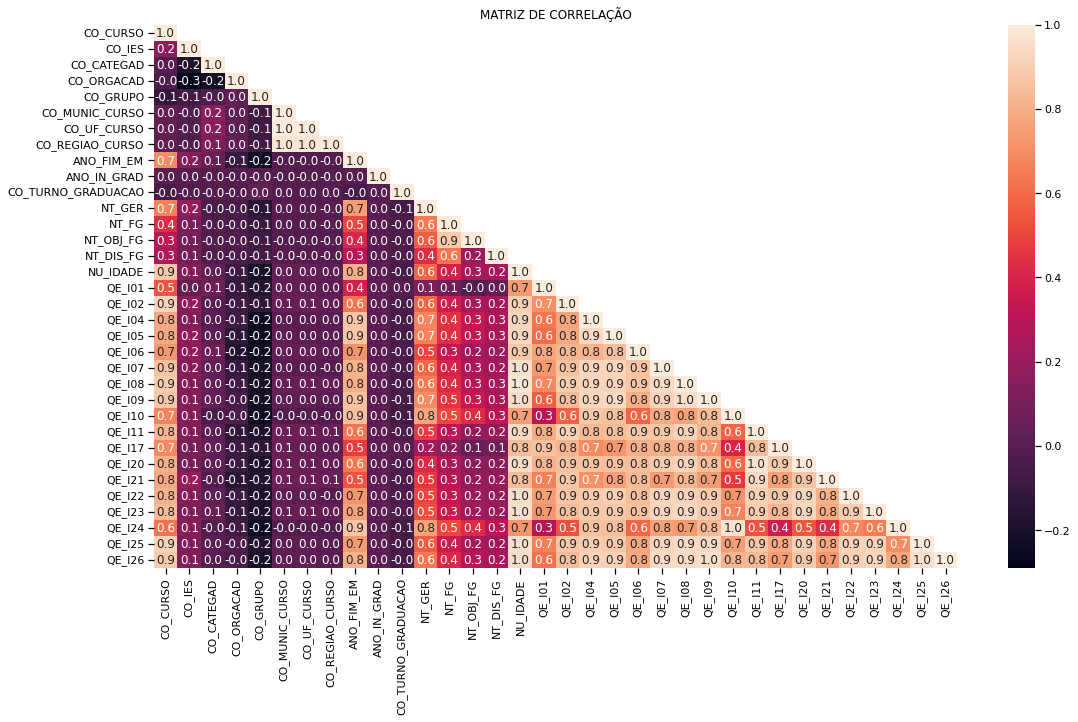

In [7]:
#Matriz de correlação
corr = df_label_enc.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(18,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.1f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.title('MATRIZ DE CORRELAÇÃO')

In [8]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

C:\Users\rafae\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [9]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [10]:
df_label_enc.drop(to_drop, axis=1, inplace=True)

In [14]:
pd.options.display.max_columns=99
df_label_enc

,CO_CURSO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MUNIC_CURSO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,NT_GER,NT_FG,NT_OBJ_FG,NT_DIS_FG,NU_IDADE,QE_I01,QE_I02,QE_I04,QE_I05,QE_I06,QE_I10,QE_I11,QE_I17,QE_I21
0,36,1,1,10028,4004,5103403,1900.0,2020.0,4.0,0.0,0.0,0.0,0.0,7.0,0,0,0,0,0,0,0,0,0
1,36,1,1,10028,4004,5103403,1900.0,2020.0,4.0,0.0,0.0,0.0,0.0,17.0,0,0,0,0,0,0,0,0,0
2,36,1,1,10028,4004,5103403,1900.0,2020.0,4.0,0.0,0.0,0.0,0.0,18.0,0,0,0,0,0,0,0,0,0
3,36,1,1,10028,4004,5103403,1900.0,2020.0,4.0,0.0,0.0,0.0,0.0,18.0,0,0,0,0,0,0,0,0,0
4,36,1,1,10028,4004,5103403,1900.0,2020.0,3.0,0.0,0.0,0.0,0.0,18.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55579,1305552,5,1,10028,4005,2211001,2017.0,2018.0,4.0,33.7,34.4,37.5,21.5,34.0,4,5,5,5,5,4,10,5,1
55580,1305552,5,1,10028,4005,2211001,2017.0,2018.0,4.0,33.7,34.4,37.5,21.5,34.0,4,5,5,5,5,4,10,5,1
55581,1305552,5,1,10028,4005,2211001,2017.0,2018.0,4.0,33.7,34.4,37.5,21.5,34.0,4,5,5,5,5,4,10,5,1
55582,1305552,5,1,10028,4005,2211001,2017.0,2018.0,1.0,33.7,34.4,37.5,21.5,34.0,4,5,6,6,5,4,10,5,1


Text(0.5, 1.0, 'MATRIZ DE CORRELAÇÃO')

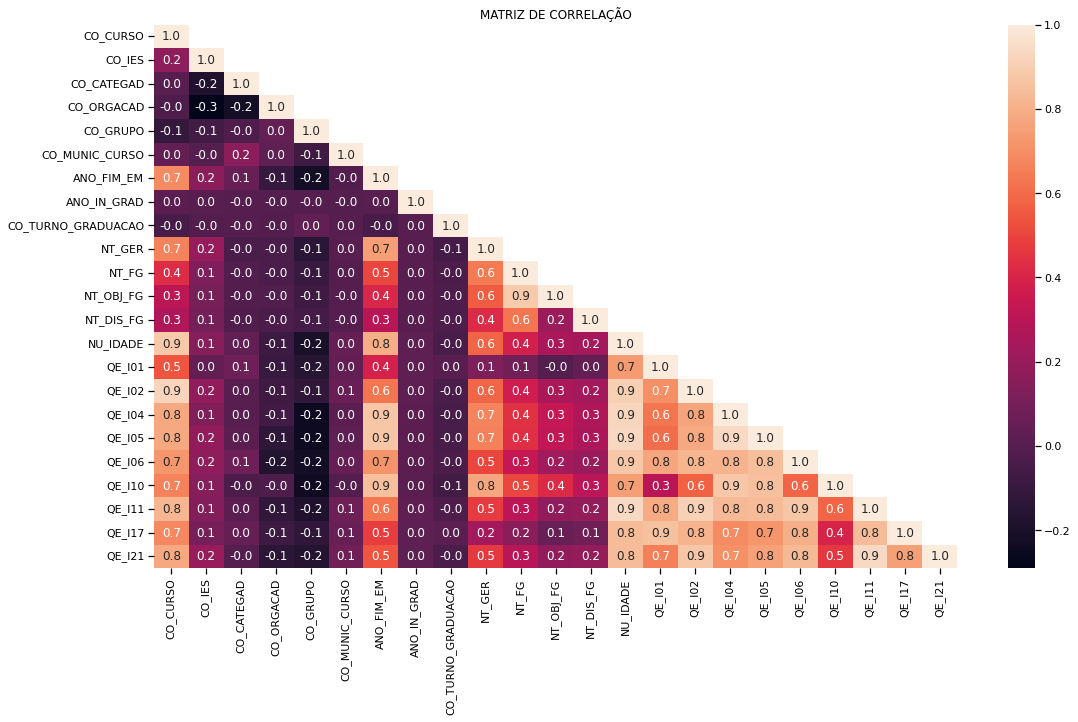

In [12]:
#Matriz de correlação
corr = df_label_enc.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(18,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.1f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.title('MATRIZ DE CORRELAÇÃO')

# Redução de dimensionalidade com Select K-best

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from imblearn.over_sampling import SMOTE

In [17]:
y = df_label_enc['NT_GER']
X = df_label_enc.drop(columns='NT_GER')

In [18]:
X_new = SelectKBest(f_classif, k=10).fit(X, y)

In [19]:
dfscores = pd.DataFrame(X_new.scores_)

In [20]:
dfcolumns = pd.DataFrame(X.columns)

In [21]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [22]:
featureScores.columns = ['Specs','Score']

In [24]:
featureScores.nlargest(30,'Score')['Score'].median()

1124.0545370568161

In [26]:
featureScores.nlargest(34,'Score')

,Specs,Score
23,QE_I10,105298.025604
30,QE_I24,88903.217401
0,CO_CURSO,5682.703747
27,QE_I21,4932.600357
8,ANO_FIM_EM,3101.464203
22,QE_I09,3064.117639
24,QE_I11,2634.165221
17,QE_I04,2373.247176
21,QE_I08,2071.014588
18,QE_I05,2018.046105


In [27]:
k_features = featureScores.nlargest(15,'Score').reset_index(drop=True)

In [28]:
cols = []
[cols.append(k_features['Specs'][x]) for x in range(len(k_features['Specs']))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# df_model = pd.concat([df_label_enc['class'], df_label_enc[cols]], axis=1)

# Categorizando a variável alvo

In [57]:
df_label_enc['NT_GER_binned_score'] = pd.cut(df_label_enc['NT_GER'], bins=[0,20,30,40,50,100], right=True, labels=False)+1

In [59]:
df_label_enc['NT_GER_binned_score'].fillna(1, inplace=True)

In [60]:
df_label_enc['NT_GER_binned_score'].value_counts()

3.0    21490
2.0    12252
4.0     8826
5.0     6909
1.0     6107
Name: NT_GER_binned_score, dtype: int64